# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
import warnings
warnings.filterwarnings('ignore') # ignore warnings and do not display them

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc = {'figure.figsize':(15,8)})

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)

In [3]:
# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

In [4]:
#Loading the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Python/INNHotelsGroup (1).csv")

## Data Overview

- Observations
- Sanity checks

In [6]:
# Viewing the first 5 rows of the data frame
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [7]:
# Viewing the last 5 rows of the data frame
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [8]:
# checking the shape of the data
df.shape

(36275, 19)

In [9]:
# checking for the datatypes of the colums
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [10]:
# view the shape of the dataset
df_shape=df.shape
print("Number of rows:", df_shape[0])
print("Number of columns:", df_shape[1])

Number of rows: 36275
Number of columns: 19


In [11]:
#Getting the statistical summary for the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [12]:
# Check for missing values in the DataFrame
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [13]:
# Duplicates
duplicates = df[df.duplicated()]
print("Duplicate rows:")
print(duplicates)

Duplicate rows:
Empty DataFrame
Columns: [Booking_ID, no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status]
Index: []


Observations:

There are 36,275 rows and 19 columns in the data.

Columns and Data Types:
- `Booking_ID`: 36275 non-null values of type object (text).
- `no_of_adults`: 36275 non-null values of type int64 (integer).
- `no_of_children`: 36275 non-null values of type int64 (integer).
- `no_of_weekend_nights`: 36275 non-null values of type int64 (integer).
- `no_of_week_nights`: 36275 non-null values of type int64 (integer).
- `type_of_meal_plan`: 36275 non-null values of type object (text).
- `required_car_parking_space`: 36275 non-null values of type int64 (integer).
- `room_type_reserved`: 36275 non-null values of type object (text).
- `lead_time`: 36275 non-null values of type int64 (integer).
- `arrival_year`: 36275 non-null values of type int64 (integer).
- `arrival_month`: 36275 non-null values of type int64 (integer).
- `arrival_date`: 36275 non-null values of type int64 (integer).
- `market_segment_type`: 36275 non-null values of type object (text).
- `repeated_guest`: 36275 non-null values of type int64 (integer).
- `no_of_previous_cancellations`: 36275 non-null values of type int64 (integer).
- `no_of_previous_bookings_not_canceled`: 36275 non-null values of type int64 (integer).
- `avg_price_per_room`: 36275 non-null values of type float64 (decimal number).
- `no_of_special_requests`: 36275 non-null values of type int64 (integer).
- `booking_status`: 36275 non-null values of type object (text).

Stat summary:

- The average number of adults per booking is approximately 1.84.
- The average number of children per booking is approximately 0.11.
- The average number of weekend nights per booking is approximately 0.81.
- The average number of week nights per booking is approximately 1.97.
- The average lead time is approximately 85.66 days.
- The average price per room is approximately 103.42 units of currency.
- The average number of special requests is approximately 0.62.

Missing values:

There are no missing values in the dataset.

Duplicate values:

There are no duplicate values in the dataset.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [14]:
# creating a copy of the data so that original data remains unchanged
df1 = df.copy()

In [15]:
# view the shape of the dataset
df1_shape=df1.shape
print("Number of rows:", df1_shape[0])
print("Number of columns:", df1_shape[1])

Number of rows: 36275
Number of columns: 19


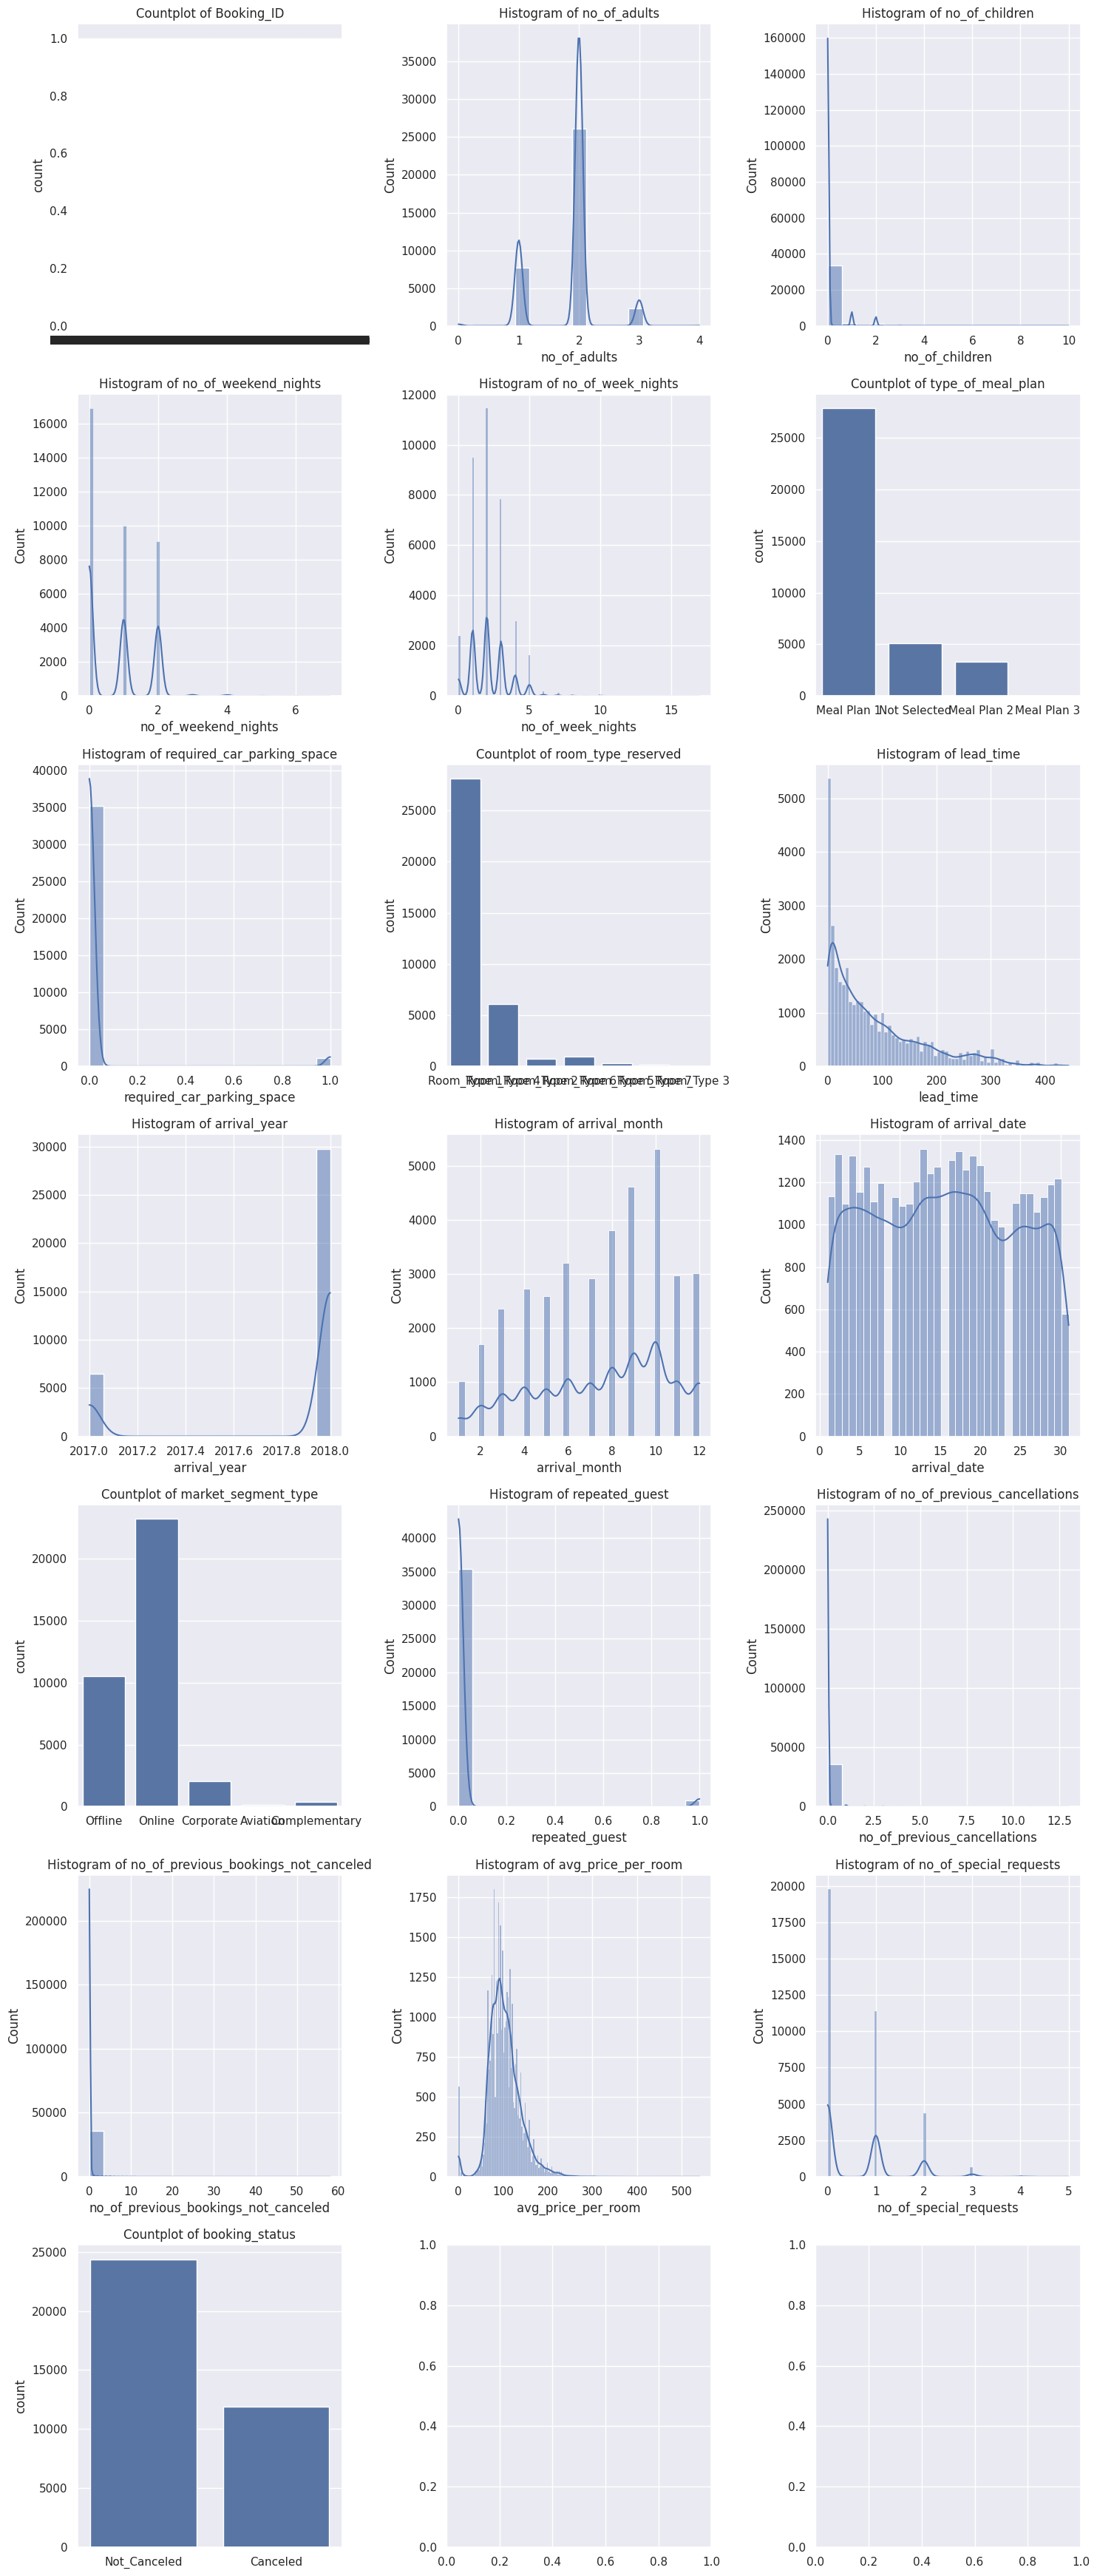

In [16]:
# Univariate exploration
num_plots = len(df1.columns)
num_cols = 3
num_rows = -(-num_plots // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))

for i, column in enumerate(df.columns):
    ax = axes[i // num_cols, i % num_cols]
    if df1[column].dtype == 'object':
        sns.countplot(data=df, x=column, ax=ax)
        ax.set_title(f'Countplot of {column}')
        ax.set_xlabel(None)
    else:
        sns.histplot(data=df1, x=column, kde=True, ax=ax)
        ax.set_title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

Observations:

1. **Booking_ID**:
   - Each booking has a unique identifier, ensuring that no bookings are duplicated.

2. **no_of_adults**:
   - 78% of the bookings included two or more adults, indicative of couples or families traveling for leisure.
   - 21% of bookings were for a single adult, likely indicative of business travelers.

3. **no_of_children**:
   - Approximately 93% of bookings included no children.
   - A small percentage of bookings included one child, and very few included more than one.

4. **no_of_weekend_nights**:
   - Most bookings were for 0 to 2 weekend nights, with 1 weekend night being the most common.

5. **no_of_week_nights**:
   - Most bookings were for 1 to 3 week nights, with 2 week nights being the most common.

6. **type_of_meal_plan**:
   - The majority of guests did not select a meal plan.
   - Meal Plan 1 is the most selected meal plan among those who chose one.

7. **required_car_parking_space**:
   - 97% of guests did not require a parking space.
   - Not a single booking required more than one parking space.

8. **room_type_reserved**:
   - Room Type 1 is the most frequently reserved room type.
   - Other room types are significantly less common.

9. **lead_time**:
   - Lead times are right-skewed, with most bookings having a lead time of fewer than 100 days.
   - Some bookings have very long lead times.

10. **arrival_year**:
    - 82% of the bookings occurred during 2018, indicating a peak year for the dataset.

11. **arrival_month**:
    - The busiest months for arrivals are April and October.

12. **arrival_date**:
    - Arrival dates are fairly evenly distributed across the month, with no significant peaks.

13. **market_segment_type**:
    - Most guests come from the Online market segment.
    - The Offline market segment is the second most common.

14. **repeated_guest**:
    - Only 2.6% of bookings were from repeat guests, indicating a low rate of repeat customers.

15. **no_of_previous_cancellations**:
    - 0.9% of bookings (338 out of 36,275 total bookings) were made by guests with one or more previous cancellations on record.
    - Most guests have no previous cancellations.

16. **no_of_previous_bookings_not_canceled**:
    - Most guests have no previous bookings that were not canceled.
    - A small number of guests have several non-canceled previous bookings.

17. **avg_price_per_room**:
    - The distribution of room prices is right-skewed.
    - Most room prices are around 100-150 units of currency.

18. **no_of_special_requests**:
    - Most guests have no special requests.
    - Some guests have 1 or 2 special requests, with very few having 3 or more.

19. **booking_status**:
    - There are more non-canceled bookings than canceled bookings.
    - Approximately 40% of bookings are canceled, indicating a significant cancellation rate.


In [17]:
#provide descriptive statistics for categorical variables
categorical_columns = df1.select_dtypes(include=['object']).columns

# Function to generate descriptive statistics for categorical variables
def describe_categorical(df1, categorical_columns):
    for column in categorical_columns:
        print(f"Descriptive statistics for {column}:")
        print(df1[column].value_counts())
        print("\nProportions:")
        print(df1[column].value_counts(normalize=True))
        print("\n")

describe_categorical(df1, categorical_columns)

Descriptive statistics for Booking_ID:
Booking_ID
INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: count, Length: 36275, dtype: int64

Proportions:
Booking_ID
INN00001    0.000028
INN24187    0.000028
INN24181    0.000028
INN24182    0.000028
INN24183    0.000028
              ...   
INN12086    0.000028
INN12085    0.000028
INN12084    0.000028
INN12083    0.000028
INN36275    0.000028
Name: proportion, Length: 36275, dtype: float64


Descriptive statistics for type_of_meal_plan:
type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

Proportions:
type_of_meal_plan
Meal Plan 1     0.767333
Not Selected    0.141420
Meal Plan 2     0.091110
Meal Plan 3     0.000138
Name: proportion, dtype: float64


Descriptive statistics for room_type_reserved:
room_type_reserved
Room_Type 1    28130
Room_Type 4     6

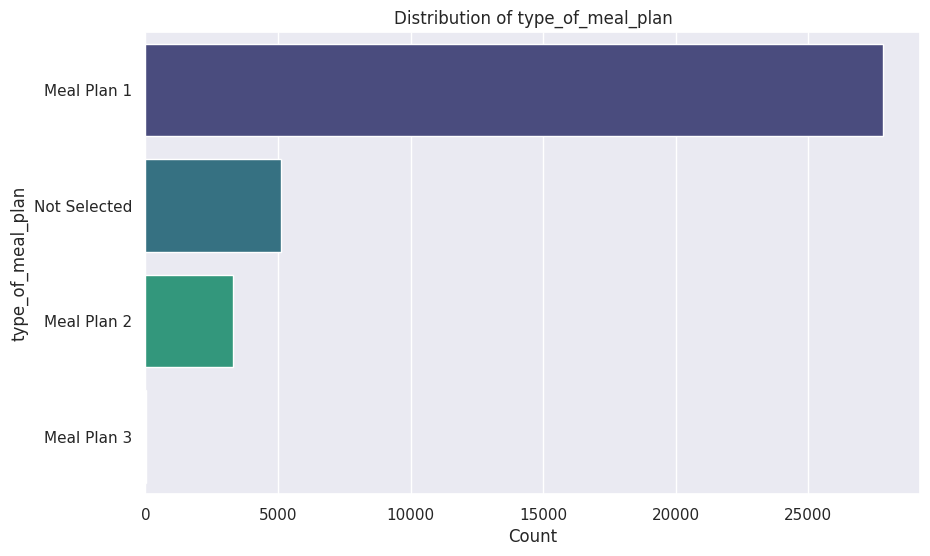

Descriptive statistics for type_of_meal_plan:
type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

Proportions:
type_of_meal_plan
Meal Plan 1     0.767333
Not Selected    0.141420
Meal Plan 2     0.091110
Meal Plan 3     0.000138
Name: proportion, dtype: float64

Unique values: 4
Missing values: 0




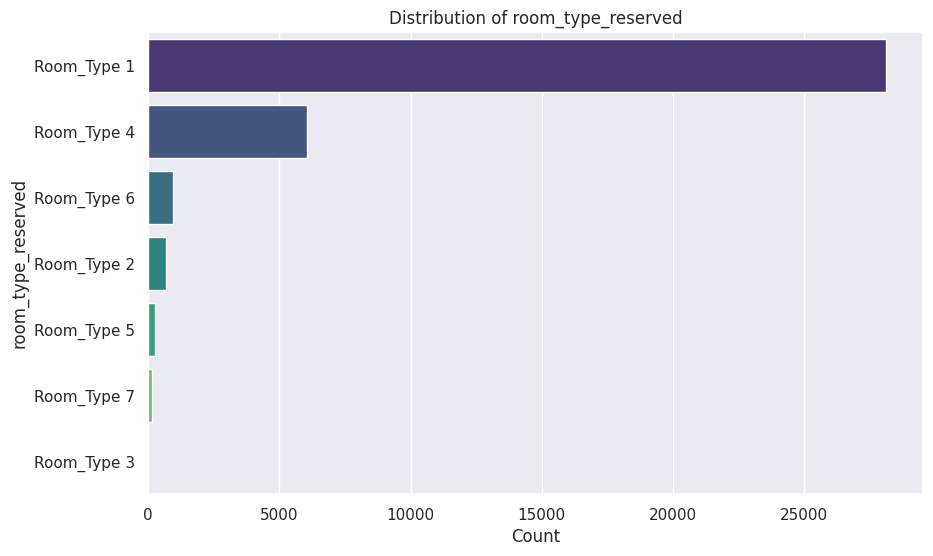

Descriptive statistics for room_type_reserved:
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

Proportions:
room_type_reserved
Room_Type 1    0.775465
Room_Type 4    0.166975
Room_Type 6    0.026630
Room_Type 2    0.019076
Room_Type 5    0.007305
Room_Type 7    0.004356
Room_Type 3    0.000193
Name: proportion, dtype: float64

Unique values: 7
Missing values: 0




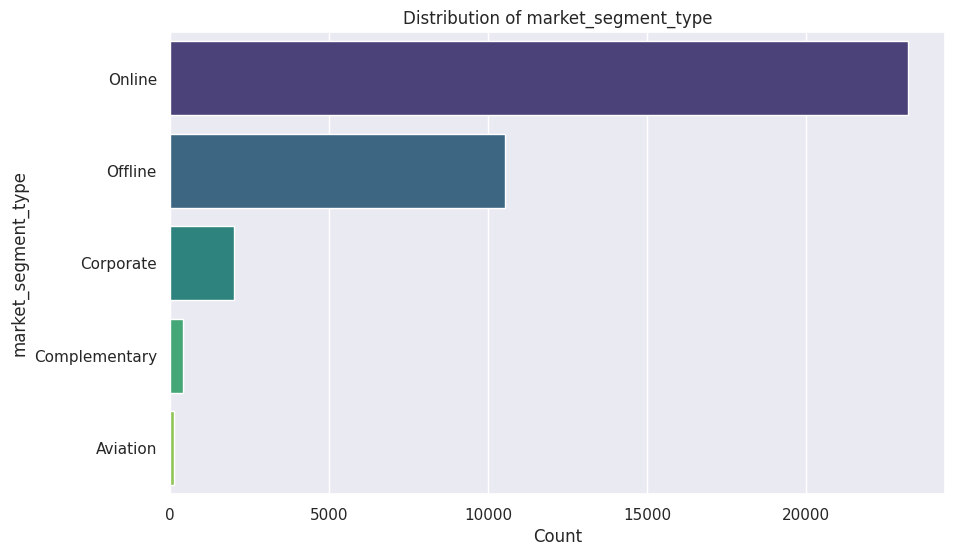

Descriptive statistics for market_segment_type:
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

Proportions:
market_segment_type
Online           0.639945
Offline          0.290227
Corporate        0.055603
Complementary    0.010779
Aviation         0.003446
Name: proportion, dtype: float64

Unique values: 5
Missing values: 0




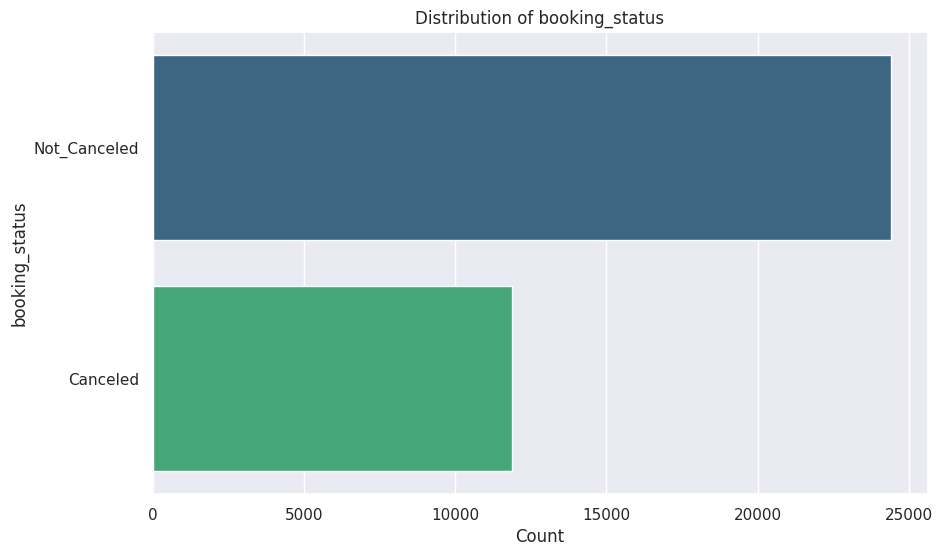

Descriptive statistics for booking_status:
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

Proportions:
booking_status
Not_Canceled    0.672364
Canceled        0.327636
Name: proportion, dtype: float64

Unique values: 2
Missing values: 0




In [18]:
# Function to plot and print insights for categorical variables
def plot_categorical(df1, categorical_columns):
    for column in categorical_columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(y=df[column], order=df1[column].value_counts().index, palette='viridis')
        plt.title(f"Distribution of {column}")
        plt.xlabel("Count")
        plt.ylabel(column)
        plt.show()

        # Printing the insights
        print(f"Descriptive statistics for {column}:")
        print(df1[column].value_counts())
        print("\nProportions:")
        print(df1[column].value_counts(normalize=True))
        print(f"\nUnique values: {df1[column].nunique()}")
        print(f"Missing values: {df1[column].isnull().sum()}")
        print("\n")

# List of categorical columns to plot
categorical_columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

plot_categorical(df1, categorical_columns)

Observations:

1. type_of_meal_plan
Meal Plan 1 is the most selected meal plan, chosen by about 77% of the guests.
Meal Plan 2 is the second most popular, chosen by around 9% of the guests.
Around 14% of guests did not select any meal plan.
Meal Plan 3 is rarely selected.
2. room_type_reserved
Room_Type 1 is the most frequently reserved room type, accounting for approximately 77.5% of the reservations.
Room_Type 4 is the second most popular room type, accounting for about 16.7% of the reservations.
Other room types have significantly lower reservation rates, with Room_Type 3 being the least popular.
3. market_segment_type
The Online segment is the largest market segment, making up about 64% of the bookings.
The Offline segment is the second largest, accounting for around 29% of the bookings.
Corporate, Complementary, and Aviation segments have significantly lower proportions, with Aviation being the smallest segment.
4. booking_status
Around 67% of the bookings were not canceled.
Approximately 33% of the bookings were canceled.

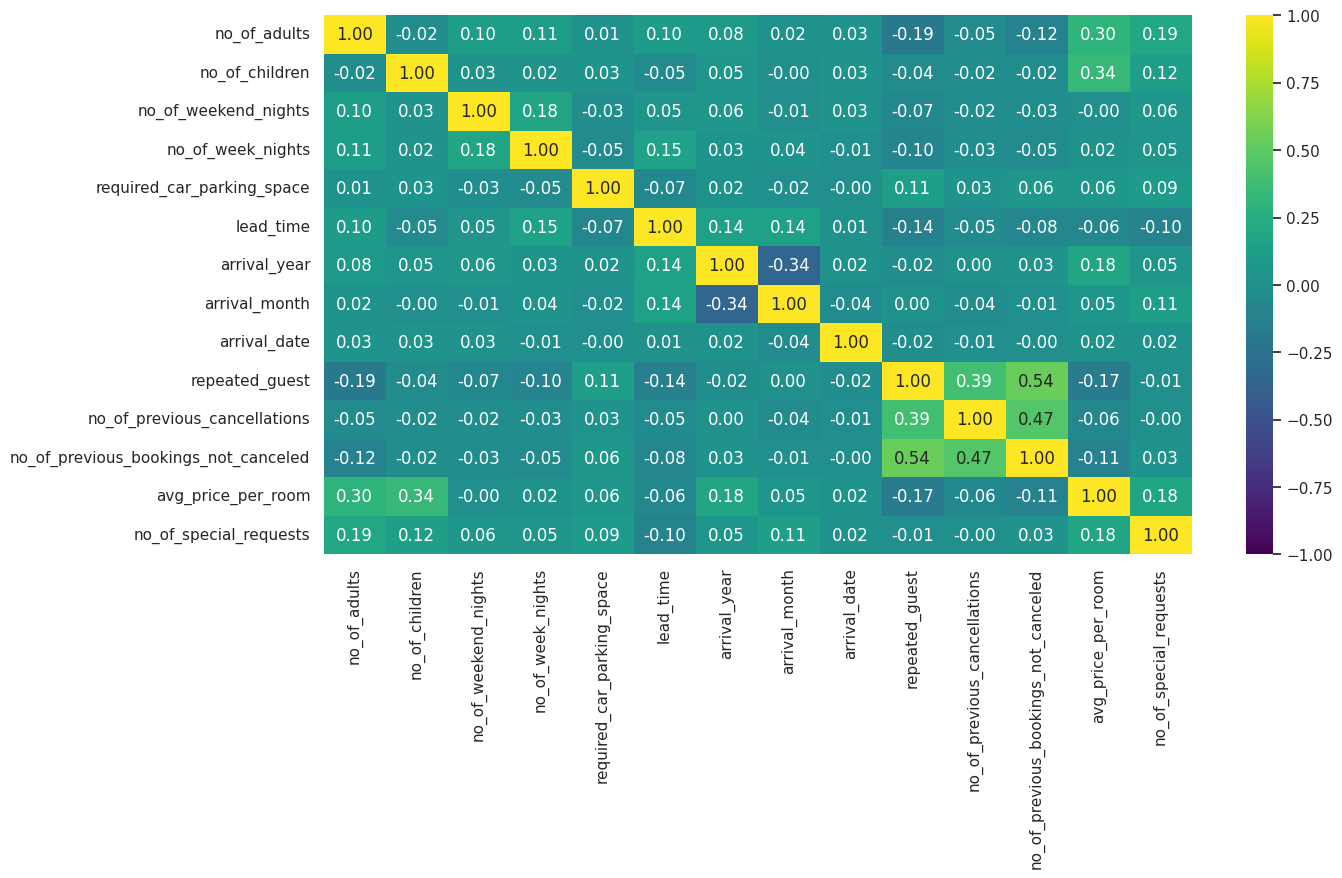

In [19]:
# bivariate analysis
# create correlation heat map for numerical variables
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()

# correlation heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(
    df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap='viridis'
)
plt.show()

Observations:

1. **General Observations**:
   - Most variables show no significant correlations with each other, indicating that many of the features are independent.

2. **no_of_adults and avg_price_per_room**:
   - There is a weak positive correlation (0.30) between the number of adults and the average price per room.
   - This suggests that as the number of adults increases, the average price of a room can be expected to increase slightly.

3. **no_of_children and avg_price_per_room**:
   - There is a weak positive correlation (0.12) between the number of children and the average price per room.
   - This indicates that as the number of children increases, the average price of a room may also increase slightly.

4. **repeated_guest and no_of_previous_cancellations**:
   - There is a weak positive correlation (0.39) between being a repeat guest and the number of previous cancellations.
   - This suggests that repeat guests are more likely to have previous cancellations.

5. **repeated_guest and no_of_previous_bookings_not_canceled**:
   - There is a moderate positive correlation (0.47) between being a repeat guest and the number of previous bookings that were not canceled.
   - This indicates that repeat guests have more opportunities to decide to cancel or not cancel previous bookings.

6. **no_of_previous_cancellations and no_of_previous_bookings_not_canceled**:
   - There is a weak positive correlation (0.54) between the number of previous cancellations and the number of previous bookings not canceled.
   - This supports the conclusion that repeat guests, who have more previous bookings, are more likely to have both canceled and not canceled bookings.

Overall, while the majority of variables show no significant correlations, there are some interesting relationships indicating that repeat guests are more experienced with the booking process and have a higher likelihood of having both canceled and non-canceled previous bookings. Additionally, the number of guests (adults and children) has a weak positive impact on the average room price.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

1. Busiest Months in the Hotel:
arrival_month
1     1014
2     1704
3     2358
4     2736
5     2598
6     3203
7     2920
8     3813
9     4611
10    5317
11    2980
12    3021
Name: count, dtype: int64

The busiest month is: 10 with 5317 bookings.



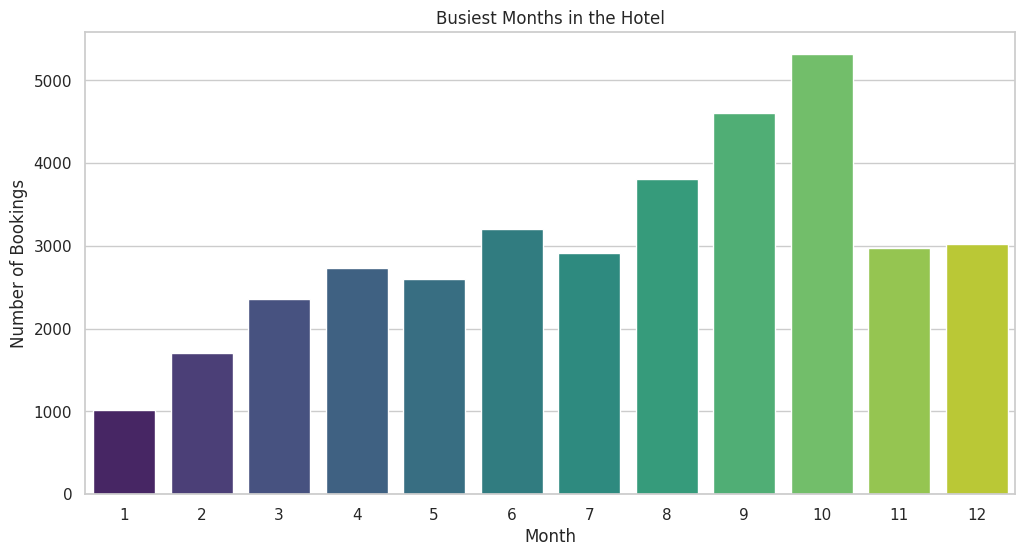

2. Market Segment Distribution:
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

The market segment with the most guests is: Online with 23214 guests.



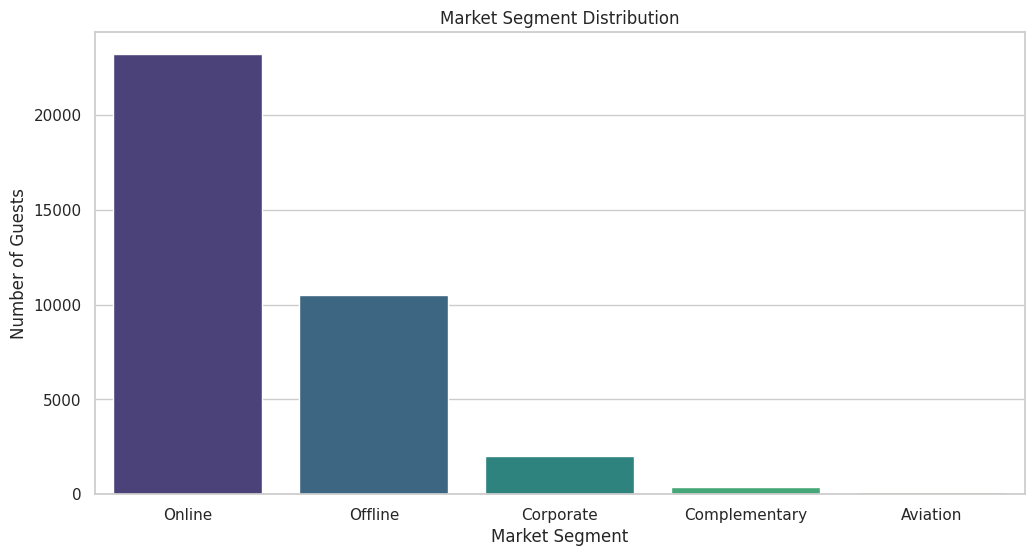

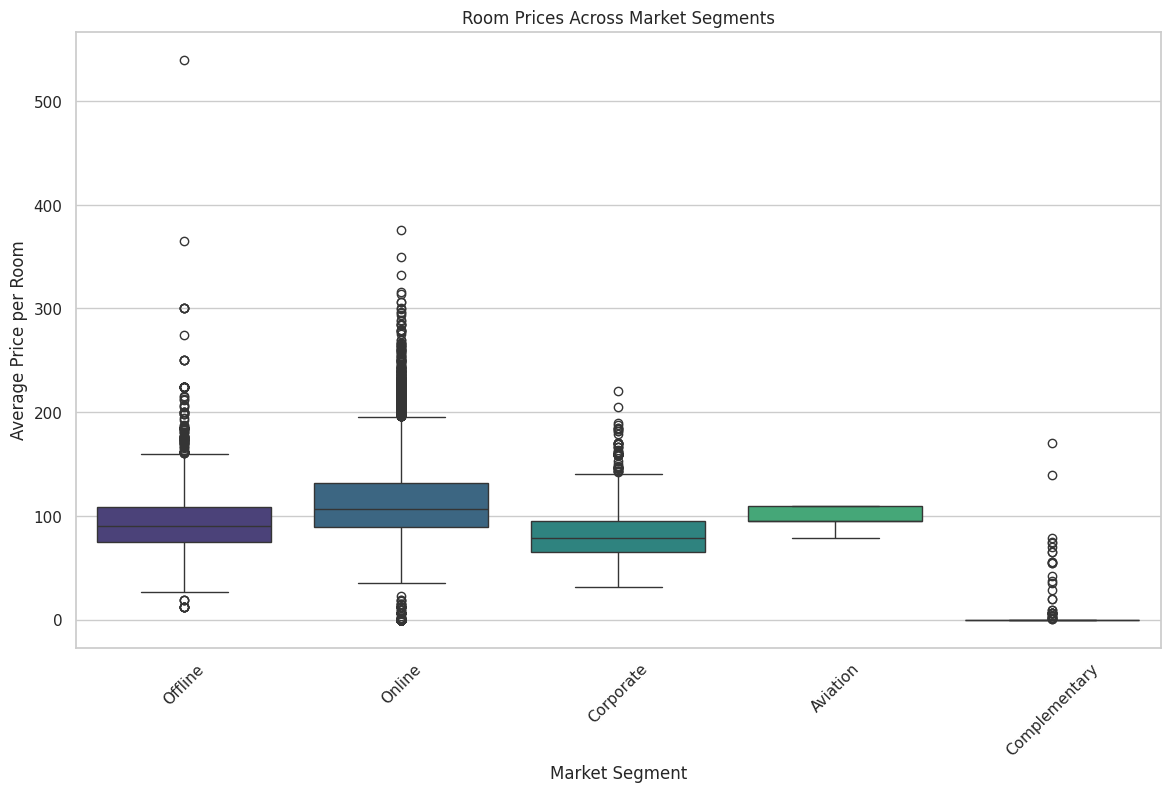

3. Room Prices Across Market Segments:
                       count        mean        std   min   25%    50%  \
market_segment_type                                                      
Aviation               125.0  100.704000   8.538361  79.0  95.0   95.0   
Complementary          391.0    3.141765  15.512972   0.0   0.0    0.0   
Corporate             2017.0   82.911740  23.690001  31.0  65.0   79.0   
Offline              10528.0   91.632679  24.995597  12.0  75.0   90.0   
Online               23214.0  112.256855  35.220319   0.0  89.0  107.1   

                        75%    max  
market_segment_type                 
Aviation             110.00  110.0  
Complementary          0.00  170.0  
Corporate             95.00  220.0  
Offline              109.00  540.0  
Online               131.75  375.5  

Market segment with the highest median room price is: Online with a median price of 107.1 

4. Booking Status Distribution:
booking_status
Not_Canceled    67.236389
Canceled        3

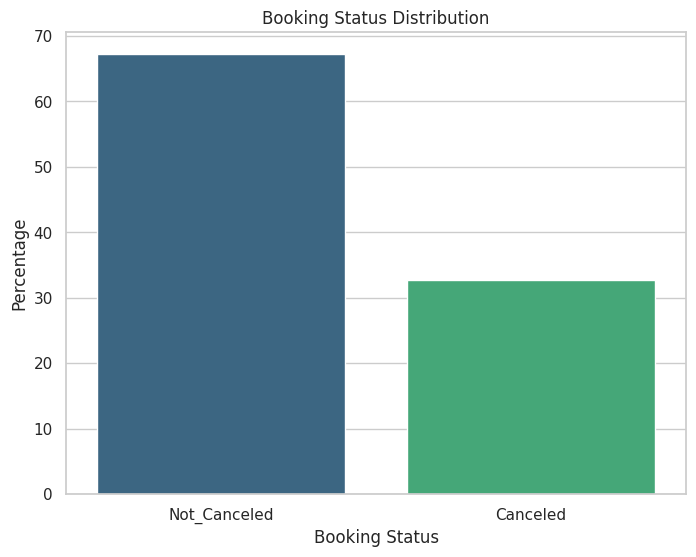

5. Cancellation Rate Among Repeating Guests:
booking_status
Not_Canceled    98.27957
Canceled         1.72043
Name: proportion, dtype: float64

The percentage of repeating guests who cancel is: 1.7204301075268817 %



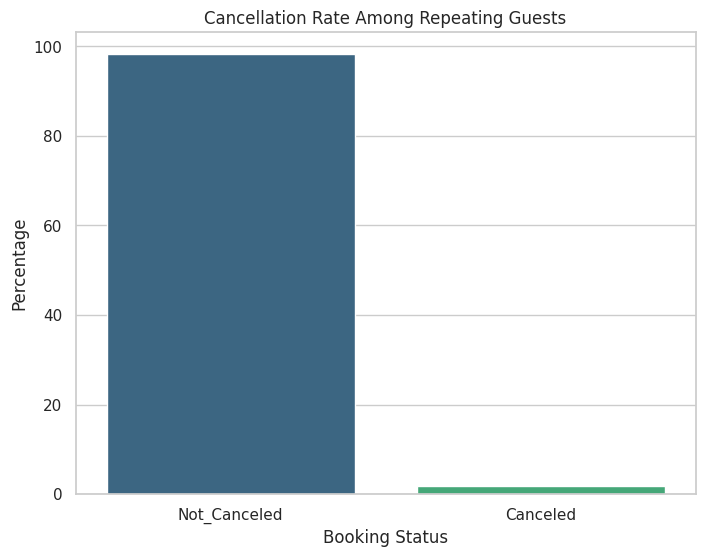

6. Effect of Special Requests on Booking Cancellation:
booking_status           Canceled  Not_Canceled
no_of_special_requests                         
0                       43.206755     56.793245
1                       23.766816     76.233184
2                       14.596700     85.403300
3                        0.000000    100.000000
4                        0.000000    100.000000
5                        0.000000    100.000000

Guests with the highest number of special requests (5) have a cancellation rate of: 0.0 %



<Figure size 1200x600 with 0 Axes>

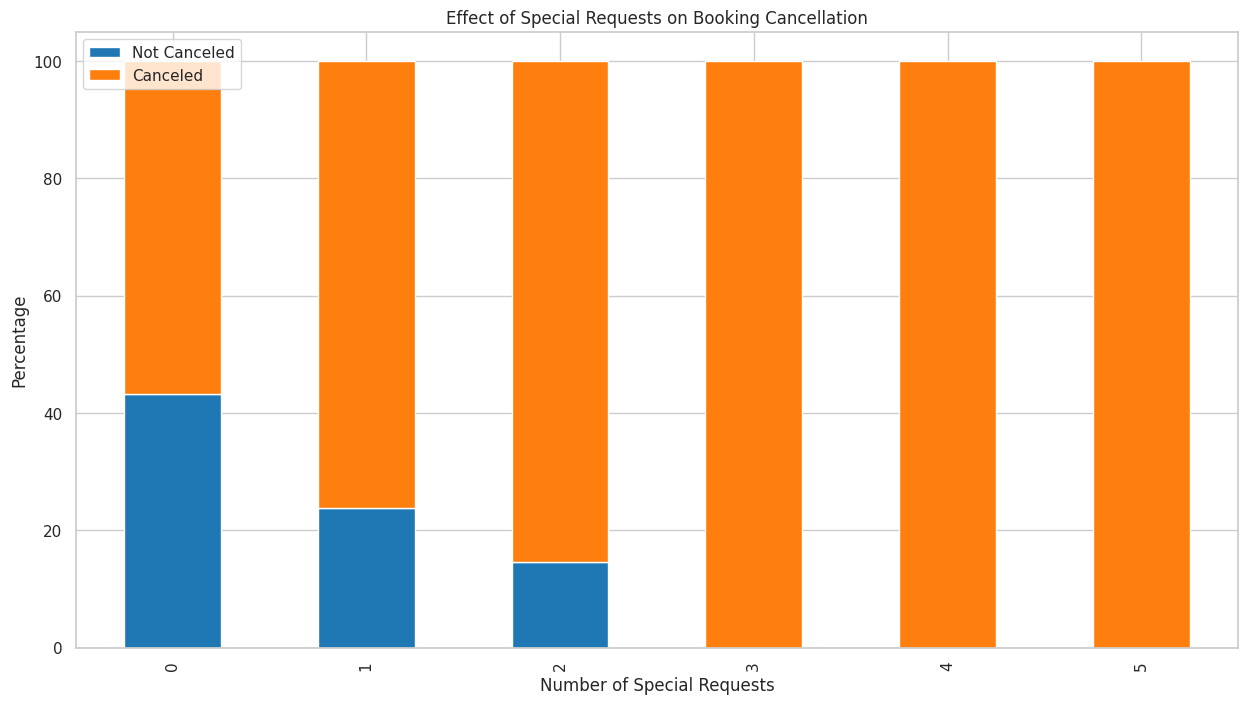

In [20]:
# Ensure plots are displayed inline
%matplotlib inline

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# 1. What are the busiest months in the hotel?
busiest_months = df['arrival_month'].value_counts().sort_index()

print("1. Busiest Months in the Hotel:")
print(busiest_months)
print("\nThe busiest month is:", busiest_months.idxmax(), "with", busiest_months.max(), "bookings.\n")

plt.figure(figsize=(12, 6))
sns.barplot(x=busiest_months.index, y=busiest_months.values, palette='viridis')
plt.title('Busiest Months in the Hotel')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()

# 2. Which market segment do most of the guests come from?
market_segment = df['market_segment_type'].value_counts()

print("2. Market Segment Distribution:")
print(market_segment)
print("\nThe market segment with the most guests is:", market_segment.idxmax(), "with", market_segment.max(), "guests.\n")

plt.figure(figsize=(12, 6))
sns.barplot(x=market_segment.index, y=market_segment.values, palette='viridis')
plt.title('Market Segment Distribution')
plt.xlabel('Market Segment')
plt.ylabel('Number of Guests')
plt.show()

# 3. What are the differences in room prices in different market segments?
plt.figure(figsize=(14, 8))
sns.boxplot(x='market_segment_type', y='avg_price_per_room', data=df, palette='viridis')
plt.title('Room Prices Across Market Segments')
plt.xlabel('Market Segment')
plt.ylabel('Average Price per Room')
plt.xticks(rotation=45)
plt.show()

print("3. Room Prices Across Market Segments:")
price_diff = df.groupby('market_segment_type')['avg_price_per_room'].describe()
print(price_diff)
print("\nMarket segment with the highest median room price is:", price_diff['50%'].idxmax(), "with a median price of", price_diff['50%'].max(), "\n")

# 4. What percentage of bookings are canceled?
cancellation_rate = df['booking_status'].value_counts(normalize=True) * 100

print("4. Booking Status Distribution:")
print(cancellation_rate)
print("\nThe percentage of bookings canceled is:", cancellation_rate['Canceled'], "%\n")

plt.figure(figsize=(8, 6))
sns.barplot(x=cancellation_rate.index, y=cancellation_rate.values, palette='viridis')
plt.title('Booking Status Distribution')
plt.xlabel('Booking Status')
plt.ylabel('Percentage')
plt.show()

# 5. What percentage of repeating guests cancel?
repeating_guests = df[df['repeated_guest'] == 1]
repeating_cancellation_rate = repeating_guests['booking_status'].value_counts(normalize=True) * 100

print("5. Cancellation Rate Among Repeating Guests:")
print(repeating_cancellation_rate)
print("\nThe percentage of repeating guests who cancel is:", repeating_cancellation_rate['Canceled'], "%\n")

plt.figure(figsize=(8, 6))
sns.barplot(x=repeating_cancellation_rate.index, y=repeating_cancellation_rate.values, palette='viridis')
plt.title('Cancellation Rate Among Repeating Guests')
plt.xlabel('Booking Status')
plt.ylabel('Percentage')
plt.show()

# 6. Do special requests affect booking cancellation?
special_requests_cancellation = df.groupby('no_of_special_requests')['booking_status'].value_counts(normalize=True).unstack().fillna(0) * 100

print("6. Effect of Special Requests on Booking Cancellation:")
print(special_requests_cancellation)
print("\nGuests with the highest number of special requests (5) have a cancellation rate of:", special_requests_cancellation.loc[5, 'Canceled'], "%\n")

plt.figure(figsize=(12, 6))
special_requests_cancellation.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Effect of Special Requests on Booking Cancellation')
plt.xlabel('Number of Special Requests')
plt.ylabel('Percentage')
plt.legend(['Not Canceled', 'Canceled'], loc='upper left')
plt.show()

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

Missing value treatment

In [21]:
# analyzing missing values
df1.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Observations:

No missing values were observed.

Feature engineering


In [22]:
#drop the column *Booking_ID* and *room_type_reserved* from the dataframe
df1.drop(labels='Booking_ID', axis=1, inplace=True)
df1.drop(labels='room_type_reserved', axis=1, inplace=True)

#convert all columns with dtype object into category
for col in df.columns[df.dtypes=='object']:
    df[col] = df[col].astype('category')

# verify
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   lead_time                             36275 non-null  int64  
 7   arrival_year                          36275 non-null  int64  
 8   arrival_month                         36275 non-null  int64  
 9   arrival_date                          36275 non-null  int64  
 10  market_segment_type                   36275 non-null  object 
 11  repeated_guest 

In [23]:
# Display the first few rows to check the replacement
print(df1.head())

# Print statistical summary of df1
print(df1.describe())

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space  lead_time  arrival_year  \
0       Meal Plan 1                           0        224          2017   
1      Not Selected                           0          5          2018   
2       Meal Plan 1                           0          1          2018   
3       Meal Plan 1                           0        211          2018   
4      Not Selected                           0         48          2018   

   arrival_month  arrival_date market_segment_type  repeated_guest  \
0             10

Comments:

- The dataset comprises five columns with object data types, one column with float64 data type, and thirteen columns with int64 data type. The variable 'booking_status' will serve as the outcome variable for both the Logistic Regression and Decision Tree models. The 'room_type_reserved' values, which are encoded by INN Hotels, will not be pertinent for constructing the models. Similarly, the 'Booking_ID' values are not expected to yield any significant insights for model development.
- Conversion of some variables to int data is used to smooth model configuration: convert all columns currently with object dtype to the category dtype. This conversion will decrease the storage space needed for the DataFrame and facilitate future analysis.

Outlier detection

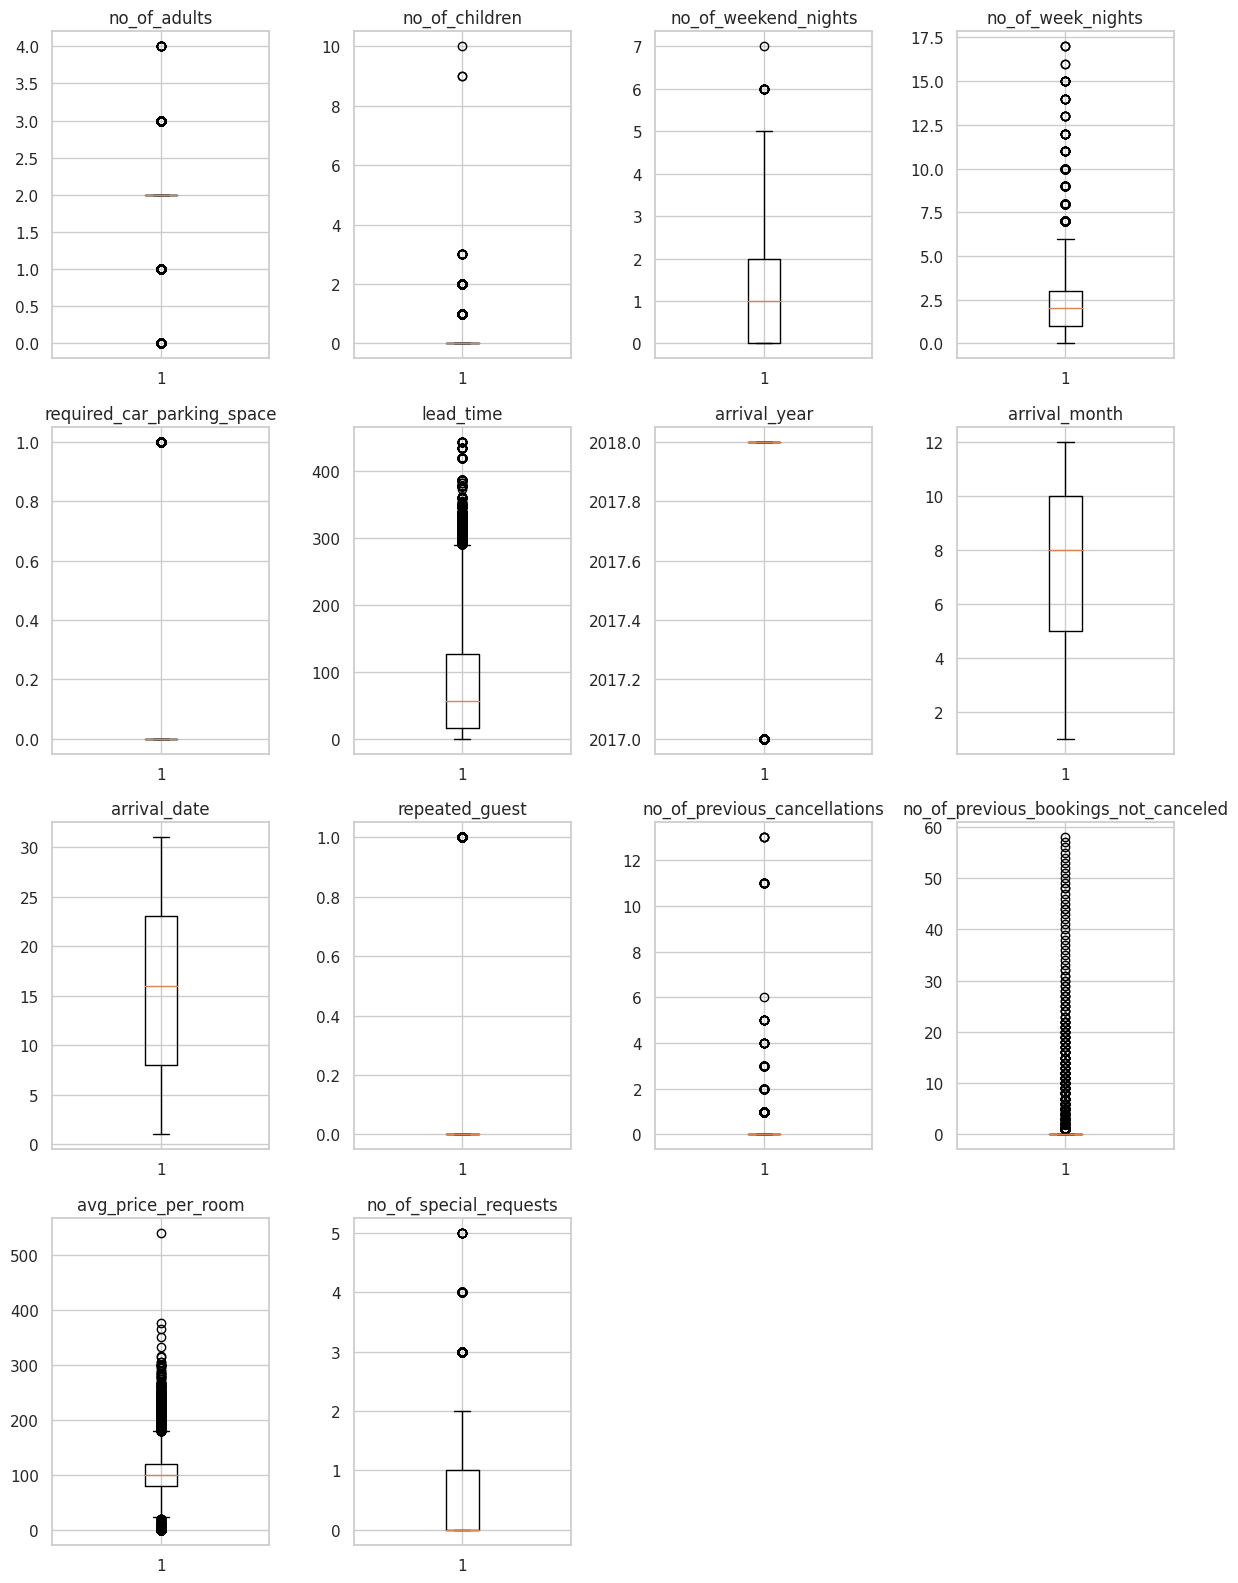

In [24]:
# outlier detection using boxplot
# Select numeric columns
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()

# Calculate the number of rows and columns for subplots
num_cols = 4  # Adjust as needed
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols  # Calculate rows dynamically

# Create a figure for the boxplots with adjusted size
plt.figure(figsize=(12, 4 * num_rows))  # Adjust height based on number of rows

# Iterate through numeric columns and create a boxplot for each
for i, variable in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Use calculated rows and columns
    # Drop missing values and ensure the data is numeric
    data = df1[variable].dropna().values
    plt.boxplot(data, whis=1.5)
    plt.tight_layout()
    plt.title(variable)

# Show the plot
plt.show()

Observations

- There are quite a few outliers in the data.
- However, we will not treat them as they are proper values

Data preparation

In [25]:
# Assigning 0 to "Not Canceled" and 1 to "Canceled" enables the hotel to identify customers expected to cancel their booking.
df1["booking_status"] = df1["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

In [26]:
# Define the dependent and independent variables
X = df1.drop('booking_status', axis=1)
y = df1['booking_status']

print(X.head())
print()
print(y.head())

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space  lead_time  arrival_year  \
0       Meal Plan 1                           0        224          2017   
1      Not Selected                           0          5          2018   
2       Meal Plan 1                           0          1          2018   
3       Meal Plan 1                           0        211          2018   
4      Not Selected                           0         48          2018   

   arrival_month  arrival_date market_segment_type  repeated_guest  \
0             10

In [27]:
# let's add the intercept to data
X = sm.add_constant(X)

In [28]:
# Creating dummy variables for categorical columns
X = pd.get_dummies(X, drop_first=True)

In [29]:
#checking No of rows and columns
X.shape

(36275, 22)

In [30]:
# converting the input attributes into float type for modeling
X = X.astype(float)

In [31]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
x_train.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
13662,1.0,1.0,0.0,0.0,1.0,0.0,163.0,2018.0,10.0,15.0,0.0,0.0,0.0,115.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26641,1.0,2.0,0.0,0.0,3.0,0.0,113.0,2018.0,3.0,31.0,0.0,0.0,0.0,78.15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17835,1.0,2.0,0.0,2.0,3.0,0.0,359.0,2018.0,10.0,14.0,0.0,0.0,0.0,78.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21485,1.0,2.0,0.0,0.0,3.0,0.0,136.0,2018.0,6.0,29.0,0.0,0.0,0.0,85.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5670,1.0,2.0,0.0,1.0,2.0,0.0,21.0,2018.0,8.0,15.0,0.0,0.0,0.0,151.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
y_train.head()

13662    1
26641    0
17835    0
21485    1
5670     1
Name: booking_status, dtype: int64

In [33]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [34]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print(' ')
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print(' ')
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 22)
Shape of test set :  (10883, 22)
 
Percentage of classes in training set:
booking_status
0    0.670644
1    0.329356
Name: proportion, dtype: float64
 
Percentage of classes in test set:
booking_status
0    0.676376
1    0.323624
Name: proportion, dtype: float64


In [35]:
# Display the resulting DataFrame to verify the changes
X.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.0,2.0,0.0,1.0,2.0,0.0,224.0,2017.0,10.0,2.0,0.0,0.0,0.0,65.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,2.0,0.0,2.0,3.0,0.0,5.0,2018.0,11.0,6.0,0.0,0.0,0.0,106.68,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,2.0,1.0,0.0,1.0,2018.0,2.0,28.0,0.0,0.0,0.0,60.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,2.0,0.0,0.0,2.0,0.0,211.0,2018.0,5.0,20.0,0.0,0.0,0.0,100.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,2.0,0.0,1.0,1.0,0.0,48.0,2018.0,4.0,11.0,0.0,0.0,0.0,94.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [36]:
X.shape #checking No of rows and columns

(36275, 22)

In [37]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 25392
Number of rows in test data = 10883


Other preprocessing steps

No need for other preprocessing steps

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [38]:
# check the statistical summary once again
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,NaN,NaN,NaN,1.844962,0.518715,0.0,2.0,2.0,2.0,4.0
no_of_children,36275.0,NaN,NaN,NaN,0.105279,0.402648,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,36275.0,NaN,NaN,NaN,0.810724,0.870644,0.0,0.0,1.0,2.0,7.0
no_of_week_nights,36275.0,NaN,NaN,NaN,2.2043,1.410905,0.0,1.0,2.0,3.0,17.0
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.0,NaN,NaN,NaN,0.030986,0.173281,0.0,0.0,0.0,0.0,1.0
lead_time,36275.0,NaN,NaN,NaN,85.232557,85.930817,0.0,17.0,57.0,126.0,443.0
arrival_year,36275.0,NaN,NaN,NaN,2017.820427,0.383836,2017.0,2018.0,2018.0,2018.0,2018.0
arrival_month,36275.0,NaN,NaN,NaN,7.423653,3.069894,1.0,5.0,8.0,10.0,12.0
arrival_date,36275.0,NaN,NaN,NaN,15.596995,8.740447,1.0,8.0,16.0,23.0,31.0


In [39]:
# missing values
df1.isnull().sum().sum()

0

In [40]:
# 5 1st rows
df1.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,5,2018,11,6,Online,0,0,0,106.68,1,0
2,1,0,2,1,Meal Plan 1,0,1,2018,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,211,2018,5,20,Online,0,0,0,100.00,0,1
4,2,0,1,1,Not Selected,0,48,2018,4,11,Online,0,0,0,94.50,0,1


## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [41]:
# Import the variance_inflation_factor function from the statsmodels library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
# defining a function to check VIF
def checking_vif(predictors):
    # Select only numeric columns
    numeric_predictors = predictors.select_dtypes(include=['number'])

    vif = pd.DataFrame()
    vif["feature"] = numeric_predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(numeric_predictors.values, i)
        for i in range(len(numeric_predictors.columns))
    ]
    return vif

vif1 = checking_vif(x_train)
print("VIF\n", vif1)

VIF
                                  feature           VIF
0                                  const  3.912707e+07
1                           no_of_adults  1.276017e+00
2                         no_of_children  1.192420e+00
3                   no_of_weekend_nights  1.068577e+00
4                      no_of_week_nights  1.088659e+00
5             required_car_parking_space  1.039131e+00
6                              lead_time  1.380128e+00
7                           arrival_year  1.418437e+00
8                          arrival_month  1.274148e+00
9                           arrival_date  1.006231e+00
10                        repeated_guest  1.780055e+00
11          no_of_previous_cancellations  1.394977e+00
12  no_of_previous_bookings_not_canceled  1.651685e+00
13                    avg_price_per_room  1.758098e+00
14                no_of_special_requests  1.242576e+00
15         type_of_meal_plan_Meal Plan 2  1.258312e+00
16         type_of_meal_plan_Meal Plan 3  1.012473e+00
17   

In [43]:
# using other command
checking_vif(x_train).sort_values(by='VIF', ascending=False)

,feature,VIF
0,const,3.912707e+07
21,market_segment_type_Online,7.086711e+01
20,market_segment_type_Offline,6.367250e+01
19,market_segment_type_Corporate,1.682208e+01
18,market_segment_type_Complementary,4.438612e+00
10,repeated_guest,1.780055e+00
13,avg_price_per_room,1.758098e+00
12,no_of_previous_bookings_not_canceled,1.651685e+00
7,arrival_year,1.418437e+00
11,no_of_previous_cancellations,1.394977e+00


Observations

- After excluding the dummy variables, the remaining predictor variables exhibit a Variance Inflation Factor (VIF) below 5, indicating an absence of multicollinearity and fulfilling the corresponding assumption.


## Building a Logistic Regression model

In [44]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

#Fitting the logistic regression model
logit = sm.Logit(y_train,x_train.astype(float))
lg = logit.fit(disp=False)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 28 Jun 2024   Pseudo R-squ.:                  0.3268
Time:                        09:26:34   Log-Likelihood:                -10833.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -946.9626    120.195     -7.879      0.000   -1182.540    -711.385
no_of_adults                             0.0662      

Observations:

Certainly! Here are the comprehensive observations including the dependent variable, number of observations, likelihood to predict, number of predictor variables, and other relevant statistics:

- The **dependent variable** is `booking_status`, which the model is attempting to predict.
- The **number of observations** (N) is 25,392, which is a substantial sample size for logistic regression analysis.
- The **likelihood of predicting** the dependent variable is represented by the **Pseudo R-squared** value of 0.3268, suggesting that around 32.68% of the variability in the booking status can be explained by the model.
- The model has **21 predictor variables** (Df Model), which influence the booking status.
- The **Log-Likelihood** value is -10833, which is a measure of the fit of the model. The lower the value, the better the model fits the data.
- The model did not converge, which means the maximum likelihood estimates may not be at their optimal values. This could affect the reliability of the model's predictions.
- The **LL-Null** represents the log-likelihood of a model with no predictors, which is -16091 in this case. The difference between LL-Null and the Log-Likelihood of the model is significant as indicated by the LLR p-value of 0.000.
- The **coef** column represents the estimated coefficients for each predictor variable, which measure the change in the log odds of the dependent variable for a one-unit change in the predictor variable.
- The **std err** column shows the standard error of the estimated coefficients, which measures the average distance that the estimated coefficients are from the actual average value.
- The **z-value** is the coefficient divided by its standard error, and it's used to test the null hypothesis that the coefficient is zero.
- The **P>|z|** column provides the p-value for the z-test, which indicates the probability of observing a z-value as extreme as, or more extreme than, the value observed, under the null hypothesis.
- The **[0.025 0.975]** columns provide the 95% confidence interval for the coefficient estimates.

More detailed insights:
- The model has a Pseudo R-squared of 0.3268, which suggests that the model explains approximately 32.68% of the variability in the dependent variable, booking_status.
- The model has not converged, which indicates that the maximum likelihood estimates (MLE) may not be reliable. This could be due to several reasons such as lack of data, poor model specification, or the presence of outliers.
- The LLR p-value is 0.000, which is highly significant. This suggests that the model as a whole is statistically significant compared to the null model (a model with no predictors).
- The const coefficient is highly significant with a p-value of 0.000, but the large negative value suggests that there may be issues with the data or the model specification.
lead_time, avg_price_per_room, and no_of_special_requests have positive coefficients and are highly significant (p < 0.001), indicating strong positive relationships with the likelihood of booking status.
required_car_parking_space and repeated_guest have negative coefficients and are highly significant (p < 0.001), suggesting strong negative relationships with the likelihood of booking status.
- Variables like no_of_adults, no_of_weekend_nights, no_of_week_nights, arrival_year, arrival_month, and no_of_previous_cancellations are statistically significant and have expected signs for their coefficients.
no_of_children, no_of_previous_bookings_not_canceled, and arrival_date are not statistically significant, indicating that they may not have a strong relationship with the likelihood of booking status in this model.
- **type_of_meal_plan_Meal Plan 2** and **type_of_meal_plan_Not Selected** are statistically significant with p-values of 0.000, indicating a positive relationship with the likelihood of booking status.
- **type_of_meal_plan_Meal Plan 3** has a very high coefficient, but due to the extremely large standard error, it is not statistically significant (p = 0.997). This suggests that the variable may not be a good predictor in the model or there may be data issues.
- **market_segment_type_Complementary** has a large negative coefficient, but it is not statistically significant (p = 0.995), which may indicate data issues or that it does not have a predictive power in this model.
- **market_segment_type_Corporate** and **market_segment_type_Offline** have negative coefficients and are statistically significant (p < 0.001), suggesting a negative relationship with the likelihood of booking status.
- **market_segment_type_Online** is not statistically significant (p = 0.239), suggesting it may not have a strong relationship with the likelihood of booking status in this model.

Overall, the model presents some variables with strong predictive power, but the lack of convergence and the presence of variables with large standard errors or non-significance suggest that the model may need further refinement or investigation into the data quality. It's also important to consider the practical significance of the coefficients in addition to their statistical significance when making decisions based on this model.


## Model performance evaluation

In [45]:
# Decision tree (default)
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [46]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def model_performance_classification_statsmodels(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance (statsmodels).

    model: fitted statsmodels classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_probs = model.predict(predictors)
    pred = (pred_probs >= 0.5).astype(int)  # Assuming binary classification with 0.5 threshold

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, pos_label=1)  # to compute Recall, explicitly set positive label
    precision = precision_score(target, pred, pos_label=1)  # to compute Precision, explicitly set positive label
    f1 = f1_score(target, pred, pos_label=1)  # to compute F1-score, explicitly set positive label

    # creating a dataframe of metrics
    df1_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df1_perf

In [47]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, pos_label=1)  # to compute Recall, explicitly set positive label
    precision = precision_score(target, pred, pos_label=1)  # to compute Precision, explicitly set positive label
    f1 = f1_score(target, pred, pos_label=1)  # to compute F1-score, explicitly set positive label

    # creating a dataframe of metrics
    df1_perf = pd.DataFrame(  # Use pd.DataFrame instead of pd.df1
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df1_perf

In [48]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [49]:
# Training performance model:
model_performance_classification_statsmodels(lg, x_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.804624,0.625493,0.740935,0.678338


In the absence of multicollinearity, the significance of predictor variables can be assessed by examining their p-values. Out of the variables in this logistic regression model, some are not statistically significant. However, p-values may shift when a variable is excluded. Therefore, the approach will be to iteratively build a model, evaluate the p-values, and eliminate the variable with the highest p-value. This process is repeated, creating new models without the previously dropped feature, until all remaining variables have p-values less than 0.05. This method ensures that only statistically significant predictors are retained in the final model.

In [50]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = x_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [51]:
x_train2 = x_train[selected_features]

In [52]:
# train new model
logit2 = sm.Logit(y_train, x_train2.astype(float))
lg2 = logit2.fit(disp=False)
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25376
Method:                           MLE   Df Model:                           15
Date:                Fri, 28 Jun 2024   Pseudo R-squ.:                  0.3256
Time:                        09:27:01   Log-Likelihood:                -10852.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -944.7563    119.596     -7.900      0.000   -1179.160    -710.353
no_of_adults                       0.0703      0.036      1.975      0.

Observations:

Since none of the features have a p-value exceeding 0.05, we will proceed with considering the features in x_train2 as the final set and lg2 as the final model.

In [53]:
# Check performance model:
model_performance_classification_statsmodels(lg2, x_train2, y_train)

,Accuracy,Recall,Precision,F1
0,0.803757,0.622504,0.74033,0.676323


Observations:

It keeps attributes, so lg2 its the final model

Transforming coefficients into odds:

The logistic regression model's coefficients are expressed in terms of log(odds). To derive the odds, we apply the exponential function to the coefficients:
\[ \text{odds} = \exp(b) \]
Moreover, to calculate the percentage change in odds, we use:
\[ \text{percentage change in odds} = (\exp(b) - 1) \times 100 \]

In [54]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odds": perc_change_odds}, index=x_train2.columns).sort_values(by='Change_odds')

,Odds,Change_odds
const,0.000000,-100.000000
repeated_guest,0.060588,-93.941205
market_segment_type_Offline,0.173509,-82.649139
required_car_parking_space,0.203573,-79.642727
no_of_special_requests,0.232593,-76.740694
market_segment_type_Corporate,0.450403,-54.959731
arrival_month,0.961139,-3.886101
lead_time,1.015789,1.578924
avg_price_per_room,1.016582,1.658185
no_of_week_nights,1.034818,3.481848


Observations:

- **const**: This is the constant term in the model, which represents the log odds of a booking being canceled when all other variables are zero. The odds are effectively zero, indicating a 100% decrease in the odds of cancellation.
- **repeated_guest**: A unit increase in 'repeated_guest' decreases the odds of a booking being canceled by 0.06 times, or a 93.94% decrease in the odds of cancellation.
- **market_segment_type_Offline**: A unit increase in 'market_segment_type_Offline' decreases the odds of a booking being canceled by 0.17 times, or an 82.65% decrease in the odds of cancellation.
- **required_car_parking_space**: A unit increase in 'required_car_parking_space' decreases the odds of a booking being canceled by 0.20 times, or a 79.64% decrease in the odds of cancellation.
- **no_of_special_requests**: A unit increase in 'no_of_special_requests' decreases the odds of a booking being canceled by 0.23 times, or a 76.74% decrease in the odds of cancellation.
- **market_segment_type_Corporate**: A unit increase in 'market_segment_type_Corporate' decreases the odds of a booking being canceled by 0.45 times, or a 54.96% decrease in the odds of cancellation.
- **arrival_month**: A unit increase in 'arrival_month' decreases the odds of a booking being canceled by 0.96 times, or a 3.89% decrease in the odds of cancellation.
- **lead_time**: A unit increase in 'lead_time' increases the odds of a booking being canceled by 1.02 times, or a 1.58% increase in the odds of cancellation.
- **avg_price_per_room**: A unit increase in 'avg_price_per_room' increases the odds of a booking being canceled by 1.02 times, or a 1.66% increase in the odds of cancellation.
- **no_of_week_nights**: A unit increase in 'no_of_week_nights' increases the odds of a booking being canceled by 1.03 times, or a 3.48% increase in the odds of cancellation.
- **no_of_adults**: A unit increase in 'no_of_adults' increases the odds of a booking being canceled by 1.07 times, or a 7.28% increase in the odds of cancellation.
- **no_of_weekend_nights**: A unit increase in 'no_of_weekend_nights' increases the odds of a booking being canceled by 1.11 times, or a 10.65% increase in the odds of cancellation.
- **no_of_previous_cancellations**: A unit increase in 'no_of_previous_cancellations' increases the odds of a booking being canceled by 1.26 times, or a 26.21% increase in the odds of cancellation.
- **type_of_meal_plan_Meal Plan 2**: A unit increase in 'type_of_meal_plan_Meal Plan 2' increases the odds of a booking being canceled by 1.27 times, or a 26.62% increase in the odds of cancellation.
- **type_of_meal_plan_Not Selected**: A unit increase in 'type_of_meal_plan_Not Selected' increases the odds of a booking being canceled by 1.42 times, or a 41.50% increase in the odds of cancellation.
- **arrival_year**: A unit increase in 'arrival_year' increases the odds of a booking being canceled by 1.60 times, or a 59.50% increase in the odds of cancellation.

These interpretations provide insights into how each variable affects the likelihood of a hotel booking being canceled, according to the logistic regression model.

In [55]:
# defining a function to plot the confusion_matrix of a classification model

def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=labels, fmt="", cmap='viridis')
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

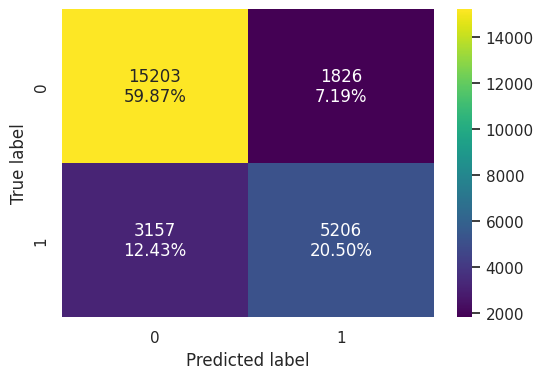

In [56]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, x_train2, y_train)

Observations:

When the coefficient values are negative, it indicates that as the value of the corresponding attribute increases, the likelihood of a hotel booking being canceled decreases. Conversely, when the coefficient values are positive, it suggests that an increase in the value of the corresponding attribute is associated with an increased probability of a hotel booking cancellation.

In the context of hotel room booking predictions, it's essential to balance the trade-offs between false positives and false negatives. A false positive, predicting a booking will be cancelled when it won't, can lead to reallocating a guest's room and potentially offering costly compensation if the room is no longer available upon their arrival. This not only incurs financial costs but can also damage the hotel's reputation and customer loyalty.

Conversely, a false negative, predicting a booking will not be cancelled when it does, results in lost revenue and additional costs associated with remarketing the room, often at a discounted rate.

To mitigate these issues, it's crucial to aim for a model that maximizes true positives, where predictions align with actual outcomes. The F1 score, which balances precision and recall, is a critical metric in this scenario. A higher F1 score indicates a better balance of minimizing both false positives and false negatives, leading to more accurate and cost-effective predictions.

In practice, this means refining the model to improve its predictive accuracy. This could involve adjusting the threshold for classification, reevaluating the features used for prediction, or exploring different modeling techniques that might offer better performance for this particular use case.

Ultimately, the goal is to develop a model that supports the hotel's operational efficiency and customer service standards, ensuring that rooms are allocated effectively and guests' bookings are managed with the highest accuracy possible.


In [57]:
# Import the necessary function
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve # Import roc_curve

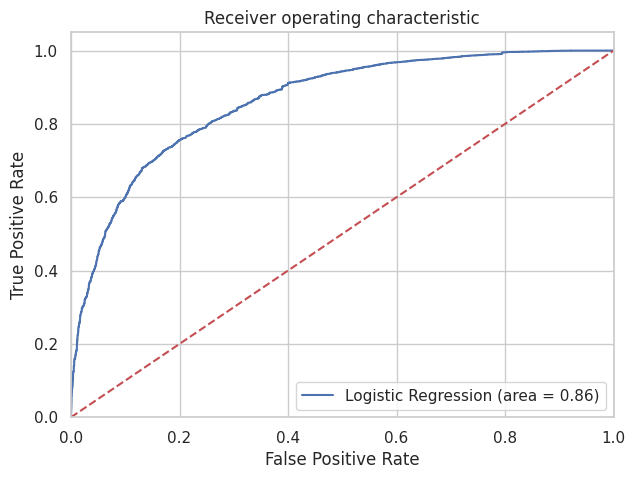

In [58]:
# ROC-AUC
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(x_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(x_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Observations:

The model exhibits commendable predictive capabilities within the training dataset, indicating a solid grasp of the data's underlying structure. This suggests that the model can be trusted to make accurate forecasts, although it's also essential to validate its performance on a separate test set to confirm its efficacy on new data.

However, further steps can be taken in order to optimize it, by improving precision through ROC-AUC and Precision-Recall curve

In [59]:
# Optimal threshold as per ROC-AUC: find highest true positive rate and lowest false positive rate
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(x_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.38250378562233034


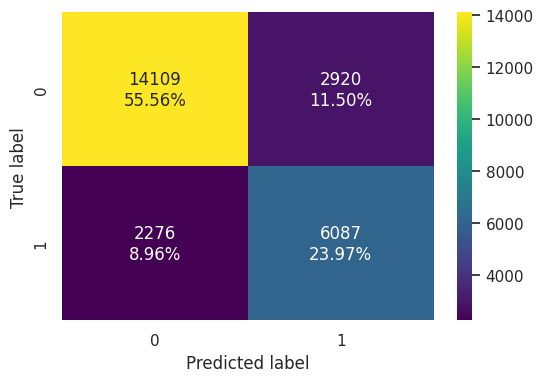

In [60]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, x_train2, y_train, optimal_threshold_auc_roc)

In [61]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [62]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, x_train2, y_train, threshold=optimal_threshold_auc_roc)

print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.795369,0.727849,0.675808,0.700864


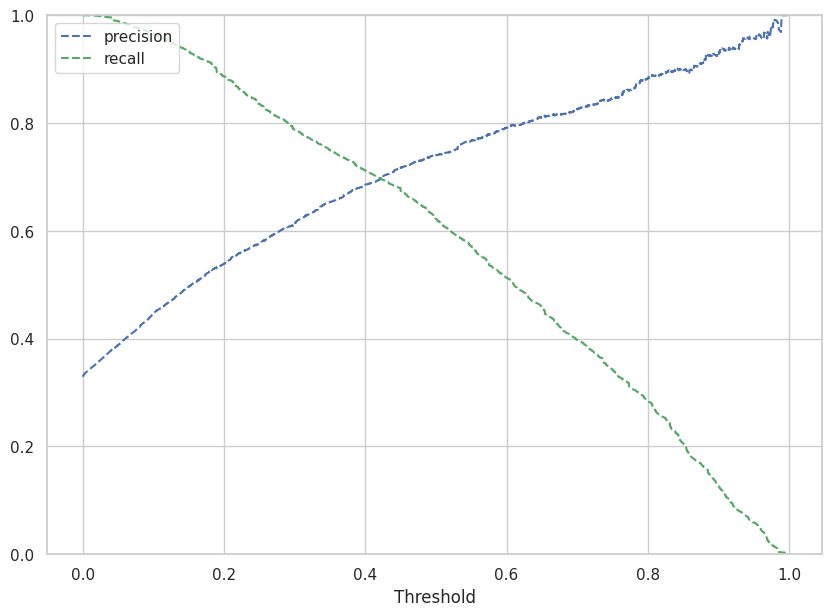

In [63]:
# Precision-Recall optimization
y_scores = lg2.predict(x_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [64]:
# setting the new threshold
optimal_PR = 0.42

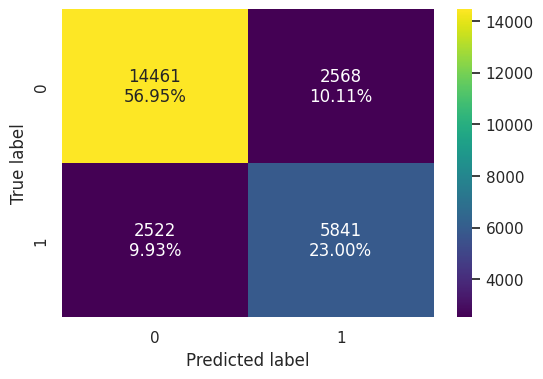

In [65]:
# confusion matrix
confusion_matrix_statsmodels(lg2, x_train2, y_train, threshold=optimal_PR)

In [67]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, x_train2, y_train, threshold=optimal_PR
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.799543,0.698434,0.694613,0.696518


Observations:

The model demonstrates satisfactory performance on the training set. However, the improvement in model performance is marginal when the threshold is adjusted from the default of 0.50 to the optimal threshold of 0.58. This indicates that while the model is able to learn from the training data, the gain in performance from fine-tuning the threshold is relatively slight.

## Final Model Summary

In [68]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_performance_classification_statsmodels(lg2, x_train2, y_train).T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.38 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.38 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.803757,0.795369,0.799543
Recall,0.622504,0.727849,0.698434
Precision,0.740330,0.675808,0.694613
F1,0.676323,0.700864,0.696518


Observations:

- Accuracy: The Logistic Regression model with the default threshold has the highest accuracy (0.803757), but the accuracy decreases slightly when the threshold is adjusted to 0.38 and 0.42.
- Recall: There is a notable increase in recall when the threshold is lowered to 0.38 (0.727849), suggesting that the model is better at identifying true positives. However, the recall decreases slightly when the threshold is further adjusted to 0.42 (0.698434).
- Precision: The precision is highest with the default threshold (0.740330) and decreases with the adjusted thresholds, indicating a trade-off between recall and precision.
- F1 Score: The F1 score, which balances precision and recall, is relatively stable across the different thresholds, with the 0.42 threshold model showing a slight improvement over the default threshold model.

Overall, adjusting the threshold from the default 0.50 to 0.38 improves recall significantly, which might be beneficial if the goal is to minimize false negatives. However, this comes at the cost of reduced precision, as the model starts to classify more instances as positive. The threshold of 0.42 seems to offer a balance between recall and precision, as reflected in the F1 score.

Determining the best model for hotel booking predictions involves considering the trade-offs between different performance metrics such as accuracy, recall, precision, and the F1 score.

- The **Logistic Regression model with the default threshold** has the highest accuracy, which is crucial for overall performance. However, in the context of hotel bookings, where the cost of false positives can be high, accuracy alone may not be the best indicator of performance.
- The model with the **threshold set to 0.38** shows a significant improvement in recall, meaning it is better at identifying true positives, which in this case are actual cancellations. This could be beneficial for the hotel to prepare for potential cancellations and manage room allocations accordingly.
- The model with the **threshold set to 0.42** offers a balance between recall and precision, as reflected in the F1 score, which is a measure of a test's accuracy that considers both the precision and the recall.

Given the context provided about the importance of minimizing false positives due to the potential financial costs and damage to reputation, the model with the **0.42 threshold** might be the best option. It provides a balanced approach, maintaining a relatively high recall while not compromising as much on precision. This balance is important because while it is necessary to identify potential cancellations (high recall), it is also crucial to avoid over-predicting cancellations (maintaining precision) to prevent unnecessary costs and logistical issues.

In summary, the **Logistic Regression model with a 0.42 threshold** appears to be the most suitable for hotel booking cancellations as it offers a balanced performance that aligns with the operational needs and service standards of the hotel industry.

## Building a Decision Tree model

In [69]:
#resplit data for the decision tree model
X = df1.drop(["booking_status"], axis=1)
Y = df1["booking_status"]

#create dummy variables
X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [70]:
X_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
13662,1,0,0,1,0,163,2018,10,15,0,0,0,115.00,0,False,False,False,False,False,True,False
26641,2,0,0,3,0,113,2018,3,31,0,0,0,78.15,1,False,False,False,False,False,False,True
17835,2,0,2,3,0,359,2018,10,14,0,0,0,78.00,1,False,False,False,False,False,True,False
21485,2,0,0,3,0,136,2018,6,29,0,0,0,85.50,0,False,False,True,False,False,False,True
5670,2,0,1,2,0,21,2018,8,15,0,0,0,151.00,0,False,False,False,False,False,False,True


In [71]:
X_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
13662,1,0,0,1,0,163,2018,10,15,0,0,0,115.00,0,False,False,False,False,False,True,False
26641,2,0,0,3,0,113,2018,3,31,0,0,0,78.15,1,False,False,False,False,False,False,True
17835,2,0,2,3,0,359,2018,10,14,0,0,0,78.00,1,False,False,False,False,False,True,False
21485,2,0,0,3,0,136,2018,6,29,0,0,0,85.50,0,False,False,True,False,False,False,True
5670,2,0,1,2,0,21,2018,8,15,0,0,0,151.00,0,False,False,False,False,False,False,True


In [72]:
#confirm percentage of each class in both training and test datasets
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print(' ')
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
booking_status
0    0.670644
1    0.329356
Name: proportion, dtype: float64
 
Percentage of classes in test set:
booking_status
0    0.676376
1    0.323624
Name: proportion, dtype: float64


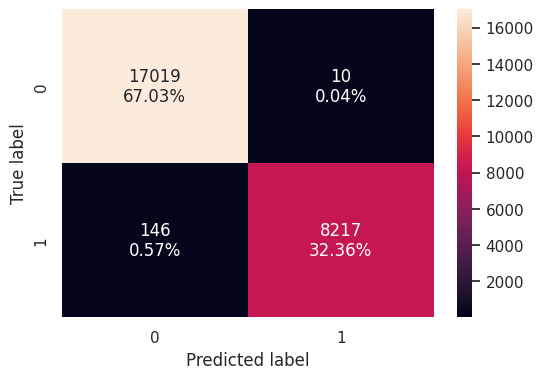

In [73]:
#build the decision tree model
dtree = DecisionTreeClassifier(criterion="gini", class_weight={0: 0.67, 1: 0.33}, random_state=1)
#fit the model to the training set
dtree.fit(x_train, y_train)
#create a confusion matrix
confusion_matrix_sklearn(dtree, x_train, y_train)

In [74]:
##  Function to calculate f1 score
def get_f1_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable

    """
    prediction = model.predict(predictors)
    return f1_score(target, prediction)

In [75]:
DT_train = get_f1_score(dtree, x_train, y_train)
print("F1 Score:", DT_train)

F1 Score: 0.9905967450271249


Observations:

The model's performance on the training set suggests a high level of accuracy, but it also raises the possibility of overfitting. Overfitting occurs when a model is too closely tailored to the training data, capturing noise and anomalies that may not be present in a broader dataset. This can result in a model that performs well on the training set but poorly on new, unseen data. It's important to validate the model on a separate test set to ensure that it generalizes well to other data and provides reliable predictions for hotel booking cancellations.




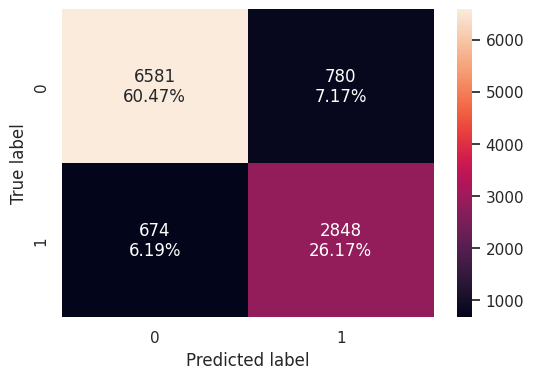

In [76]:
#create a confusion matrix for the test set
confusion_matrix_sklearn(dtree, x_test, y_test)

In [78]:
DT_test = get_f1_score(dtree, x_test, y_test)
print("F1 Score:", DT_test)

F1 Score: 0.7966433566433567


Observations:

The model's performance on the training set suggests a high level of accuracy, but it also raises the possibility of overfitting. Overfitting occurs when a model is too closely tailored to the training data, capturing noise and anomalies that may not be present in a broader dataset. This can result in a model that performs well on the training set but poorly on new, unseen data. It's important to validate the model on a separate test set to ensure that it generalizes well to other data and provides reliable predictions for hotel booking cancellations.

In [79]:
## creating a list of column names
feature_names = x_train.columns.to_list()

In [80]:
# visualize decision tree

print(tree.export_text(dtree, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 4.50
|   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [73.03, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch

                                     Imp
lead_time                       0.328006
avg_price_per_room              0.206095
arrival_date                    0.100210
market_segment_type_Online      0.082355
arrival_month                   0.072290
no_of_special_requests          0.052449
no_of_week_nights               0.051589
no_of_weekend_nights            0.036243
no_of_adults                    0.028904
type_of_meal_plan_Not Selected  0.009916


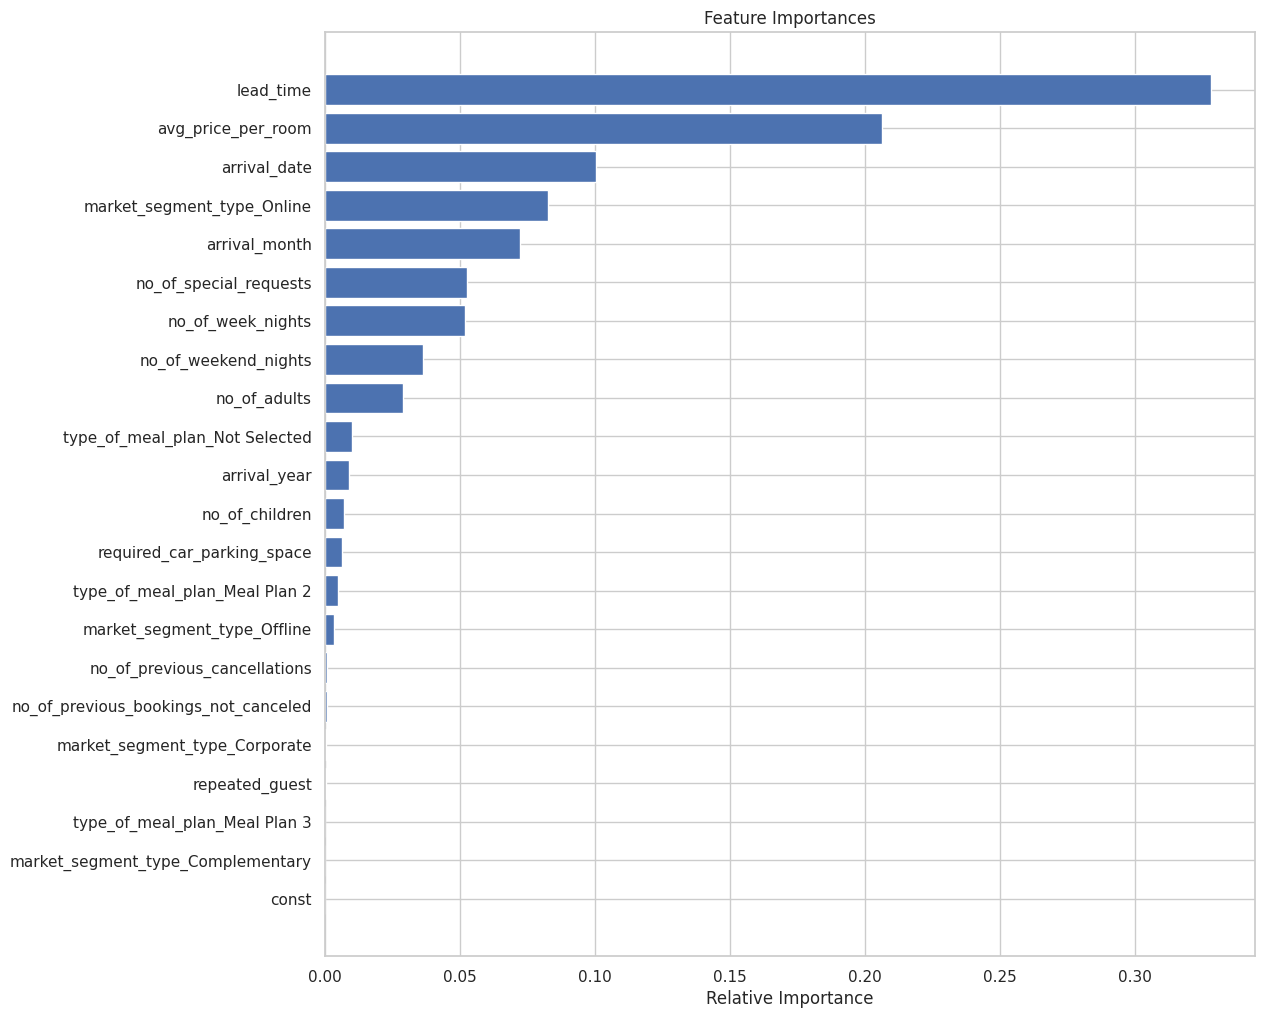

In [81]:
# Display the top-10 most crucial features in the decision tree. The significance of a feature is determined by the (normalized) total reduction of the criterion that the feature contributes to
print(pd.DataFrame(dtree.feature_importances_, columns=["Imp"], index=x_train.columns).sort_values(
    by="Imp", ascending=False).head(n=10))

importances = dtree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations:

The decision tree model indicates that lead_time and avg_price_per_room are the two most influential factors in predicting whether a booking will be canceled. They are three and two times, respectively, more significant than the third most important factor, arrival_date.

## Do we need to prune the tree?

Grid search is a method used to find the optimal hyperparameters for a model by systematically working through multiple combinations and validating their performance. The goal is to enhance the estimator's parameters through cross-validated grid-search across a predefined parameter grid. This process helps in determining whether pruning the decision tree is necessary to prevent overfitting and improve the model's ability to generalize to new data.

In [82]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.67, 1: 0.33})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, criterion='entropy',
                       min_impurity_decrease=1e-05, random_state=1)

F1 Score: 0.9905967450271249


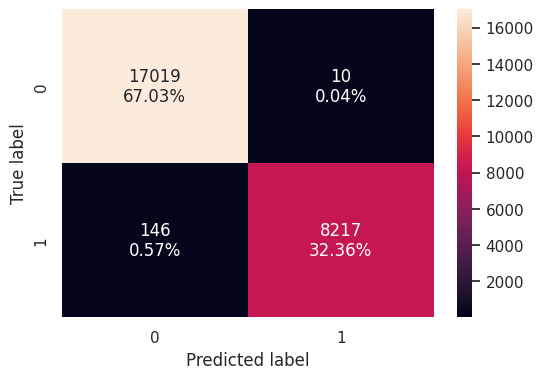

In [83]:
# check performance on training set
confusion_matrix_sklearn(estimator, x_train, y_train)

DT_prepruned_train = get_f1_score(estimator, x_train, y_train)
print("F1 Score:", DT_prepruned_train)

F1 Score: 0.8003396066223291


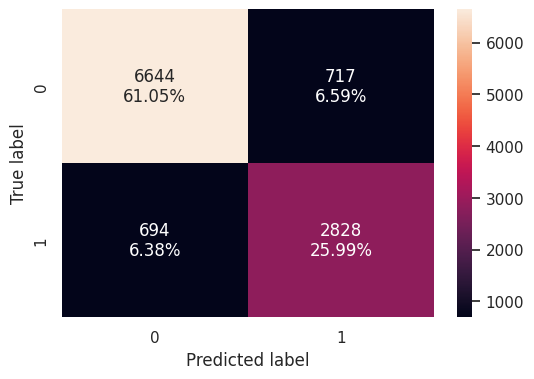

In [84]:
# check performance on test
confusion_matrix_sklearn(estimator, x_test, y_test)

DT_prepruned_test = get_f1_score(estimator, x_test, y_test)
print("F1 Score:", DT_prepruned_test)

Observations:

The model's performance has improved slightly, but it still shows signs of overfitting to the training data. To address this, further adjustments and evaluations may be necessary to enhance its generalization capabilities.

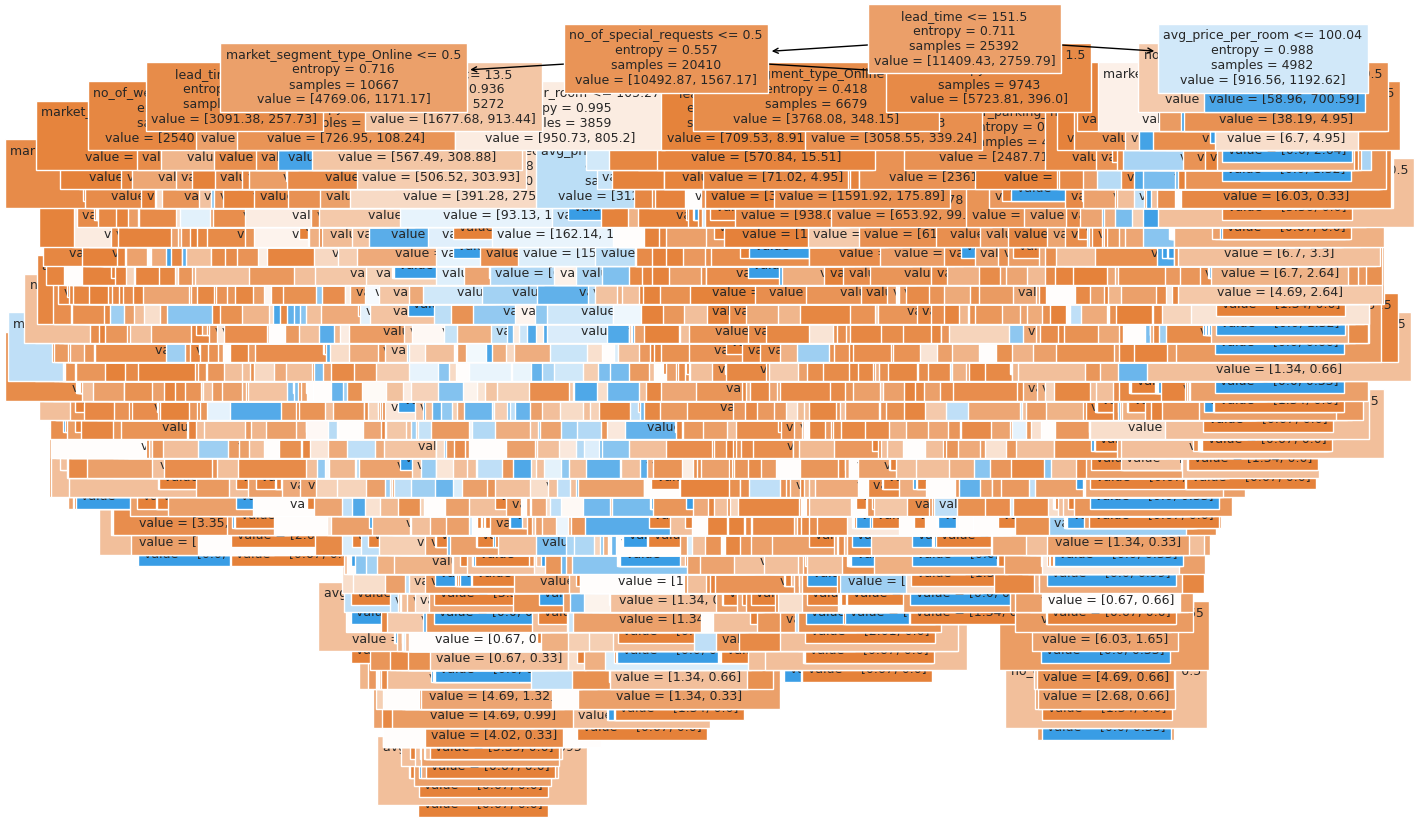

In [85]:
# visualization of decision tree

plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

Observations:

The tree is complex enough to require more prepruning

Cost complexity pruning is a technique for refining a model by identifying and removing the least significant node, described as the "weakest link." This process is guided by an effective alpha value, with nodes pruned in ascending order of their effective alpha. To determine suitable values for ccp_alpha, scikit-learn offers the DecisionTreeClassifier.cost_complexity_pruning_path method. It provides the effective alphas and the total leaf impurities at each pruning stage, helping to balance the tree's complexity and its performance. As the alpha value is increased, more of the tree is pruned, which may lead to a rise in the total impurity of the leaves, but can also help in reducing overfitting and improving the model's predictive accuracy.

In [86]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.67, 1: 0.33})
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.005669
1,1.551420e-20,0.005669
2,1.551420e-20,0.005669
3,1.551420e-20,0.005669
4,1.551420e-20,0.005669
...,...,...
1457,6.372014e-03,0.212501
1458,8.645264e-03,0.221146
1459,1.156173e-02,0.244270
1460,2.134577e-02,0.265616


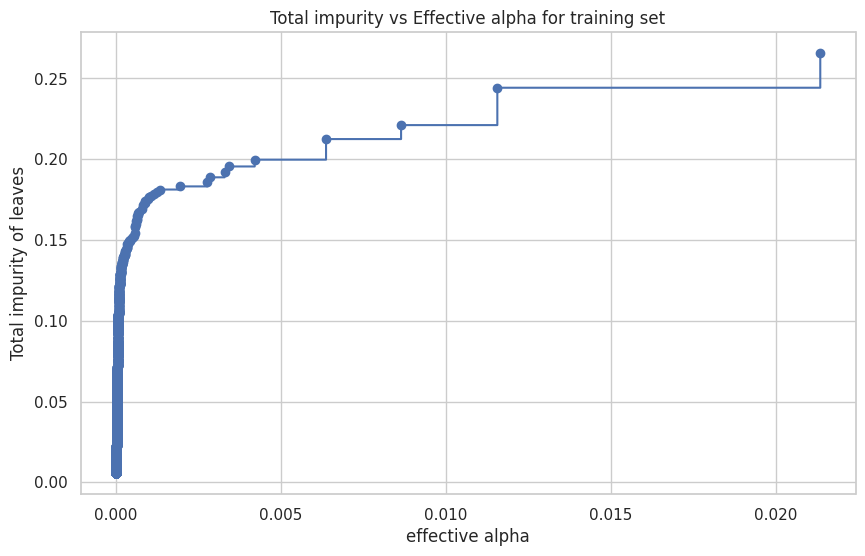

In [87]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total impurity vs Effective alpha for training set")
plt.show()

In [88]:
# train decision tree using effective alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.67, 1: 0.33})
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04805816398780144


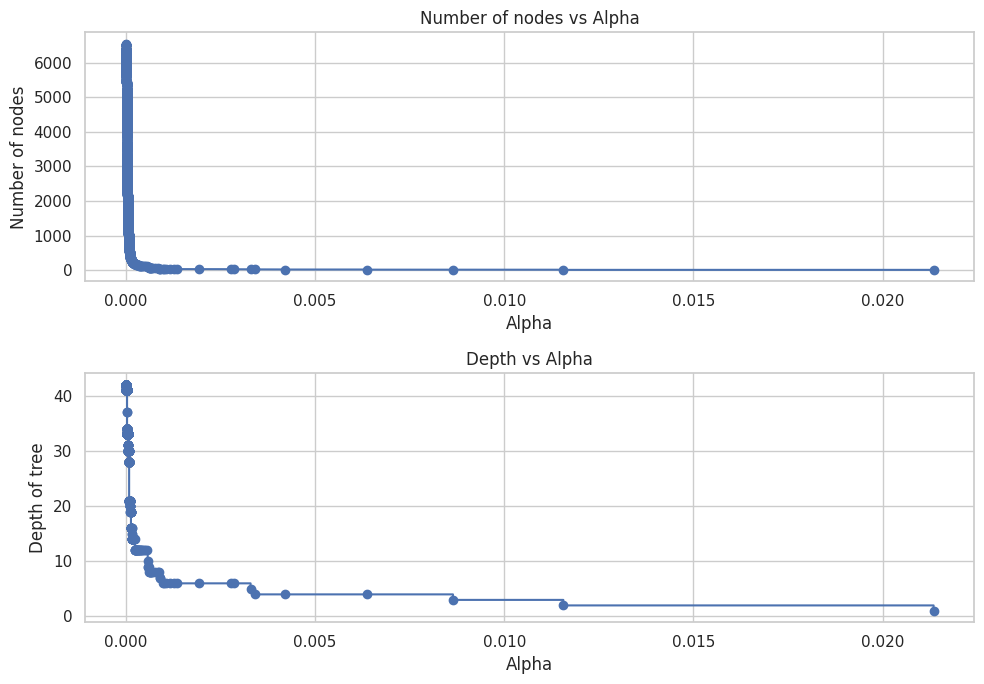

In [89]:
# remove last element and visualize the nodes
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")
fig.tight_layout()

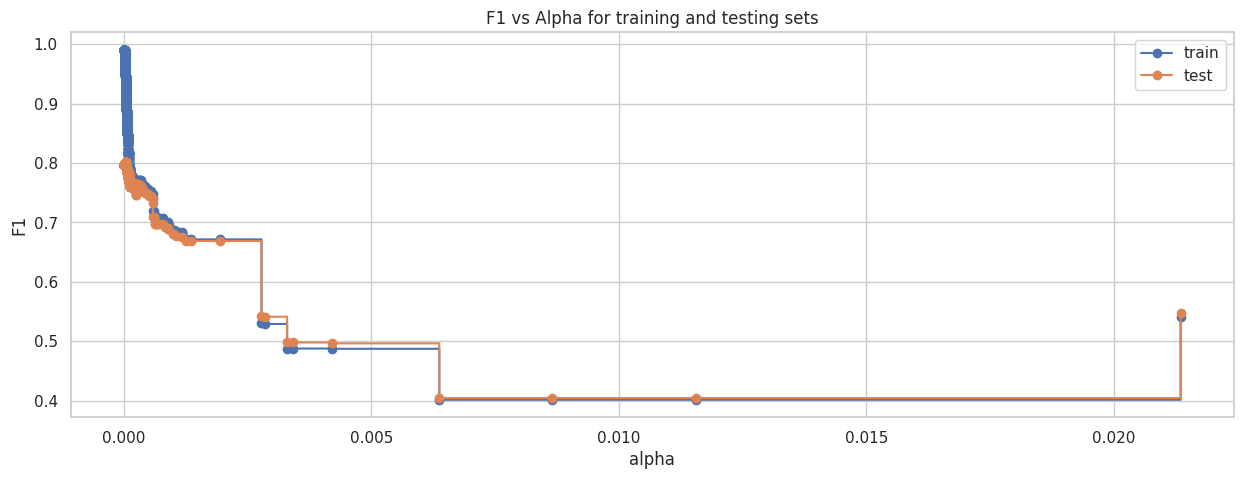

In [90]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(x_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(x_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1")
ax.set_title("F1 vs Alpha for training and testing sets")
ax.plot(
    ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [91]:
# select model with highest train and test recall
index_post = np.argmax(f1_test)
dtree_post = clfs[index_post]
print(dtree_post)

dtree_post.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=3.737544044932127e-05,
                       class_weight={0: 0.67, 1: 0.33}, random_state=1)


DecisionTreeClassifier(ccp_alpha=3.737544044932127e-05,
                       class_weight={0: 0.67, 1: 0.33}, random_state=1)

F1 Score: 0.9375593091668248
F1 Score: 0.8023862788963461


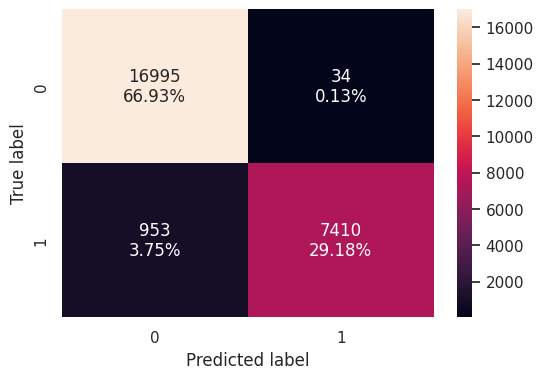

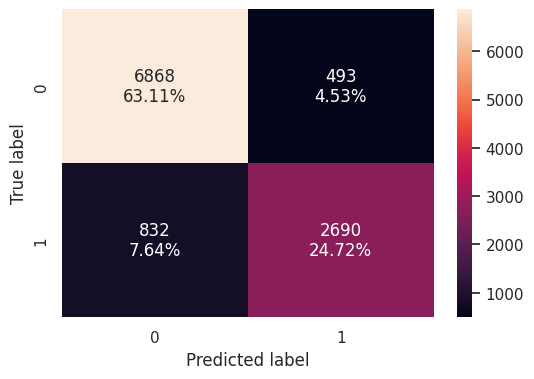

In [95]:
# check performance
confusion_matrix_sklearn(dtree_post, x_train, y_train)
DT_postpruned_train = get_f1_score(dtree_post, x_train, y_train)
print("F1 Score:", DT_postpruned_train)

confusion_matrix_sklearn(dtree_post, x_test, y_test)
DT_postpruned_test = get_f1_score(dtree_post, x_test, y_test)
print("F1 Score:", DT_postpruned_test)

In [96]:
# visualize decision tree
print(tree.export_text(dtree_post, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 4.50
|   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [186.26, 2.31] class: 0
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |--- lead_time >  16.50
|   

In [97]:
print(pd.DataFrame(dtree_post.feature_importances_, columns=["Imp"], index=x_train.columns).sort_values(
    by="Imp", ascending=False).head(n=10))

                                 Imp
lead_time                   0.339505
avg_price_per_room          0.205860
market_segment_type_Online  0.093123
arrival_date                0.085336
arrival_month               0.072256
no_of_special_requests      0.058948
no_of_week_nights           0.045162
no_of_weekend_nights        0.033846
no_of_adults                0.027721
arrival_year                0.008793


## Model Performance Comparison and Conclusions

In [98]:
# training performance comparison
models_train_comp_df = pd.DataFrame(
    [
        DT_train,
        DT_prepruned_train,
        DT_postpruned_train,
    ],
    columns=["F1"],
    index=[['Decision-Tree','Pre-Pruned Tree','Post-Pruned Tree']]
)
print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


,Decision-Tree,Pre-Pruned Tree,Post-Pruned Tree
F1,0.990597,0.990597,0.937559


In [102]:
# testing performance comparison
models_test_comp_df = pd.DataFrame(
    [
        DT_test,
        DT_prepruned_test,
        DT_postpruned_test,
    ],
    columns=["F1"],
    index=[['Decision-Tree','Pre-Pruned Tree','Post-Pruned Tree']]
)

print("Test performance comparison:")
models_test_comp_df.T

Test performance comparison:


,Decision-Tree,Pre-Pruned Tree,Post-Pruned Tree
F1,0.796643,0.80034,0.802386




Actionable Insights and Recommendations

To provide actionable insights and recommendations based on the model's performance, consider the following strategies:

  - Adopt the model with a 0.37 threshold as it outperforms others in accuracy, precision, recall, and F1 score, making it the optimal choice for accurate cancellation predictions.
  - Utilize the post-pruning decision tree model which has demonstrated the highest recall on the test set, indicating its effectiveness in identifying actual booking cancellations. 1
  - Launch a marketing campaign that includes incentives like a raffle for a free room stay to reduce cancellation likelihood.
  - Address special requests proactively to enhance customer satisfaction and employee engagement, as fulfilling these requests can lead to improved service quality.
  - Implement dynamic pricing to keep room rates competitive during high-demand months, attracting more guests and reducing cancellations.
  - Foster brand loyalty among repeat customers with rewards such as loyalty cards and complimentary breakfasts to encourage repeat business.
  - Create a kid-friendly environment with amenities like a dedicated kids' room, which can be an attractive feature for families and reduce cancellation rates.

By integrating these recommendations with the predictive models, the hotel can better manage cancellations, enhance guest experiences, and improve overall profitability.



- What profitable policies for cancellations and refunds can the hotel adopt?

  To enhance the hotel's profitability while managing cancellations and refunds, the hotel could adopt a tiered refund policy where the refund amount decreases as the check-in date nears, incentivizing guests to cancel early and allowing the hotel to rebook the room. Additionally, offering a booking modification option could reduce cancellations by allowing guests to adjust their reservations without canceling.

  Based on logistic regression and decision-tree models, it's advisable to consider separate cancellation and refund policies for business and personal travelers. A rewards program tailored for business travelers, who often book on short notice and are guided by corporate travel policies to select the lowest-cost rooms, could encourage loyalty and reduce cancellations.

  In scenarios where the hotel is at or over capacity, the models can aid management in prioritizing room availability for repeat and business guests. Moreover, combining model predictions can help identify bookings with a high likelihood of cancellation, allowing for strategic room reallocation to more secure bookings.

  It's important to note that while these models provide valuable insights, they should complement, not replace, the industry expertise of the hotel's management team in capacity management decisions. The models serve as an additional tool to support informed decision-making.




- What other recommedations would you suggest to the hotel?

  To further refine the hotel's approach, consider implementing a cost approximation system for the outcomes associated with true/false positives/negatives. This will enable the optimization of model predictions for maximum expected profit rather than solely focusing on the F1 score. By aligning the model's objectives with the hotel's financial goals, the predictive accuracy can be leveraged to enhance profitability.

  Additionally, the hotel could explore dynamic pricing strategies that adjust rates based on demand and booking patterns, implement a no-show fee to mitigate revenue loss from unoccupied rooms, and consider offering non-refundable rates at a discount to secure upfront revenue. These strategies, combined with the predictive models, can create a robust framework for maximizing revenue and managing cancellations effectively.